# Programa de Pós-graduação em ciência de Dados e Analytics da PUC-RJ
# MVP - Sprint Análise de Dados e Boas Práticas
Este é o MVP apresentado por Leonardo Honorato Santos ([Lattes](http://lattes.cnpq.br/7582114706936483), [GitHub](https://github.com/L-Honorato)) como requisito para aprovação na *sprint* da disciplina de análise de dados da pós-graduação *latu sensu* em ciência de dados da PUC-RJ.  

Como tema deste MVP, decidi iniciar um produto prático relacionado às minhas atividades profissionais. Trata-se do [Observatório Curica](https://github.com/L-Honorato/OBS_Curica.git), um projeto em desenvolvimento dentro da Promotoria de Defesa da Criança e do Adolescente de Cruzeiro do Sul, do Ministério Público do Estado do Acre ([MPAC](https://www.mpac.mp.br/)), que utiliza os conhecimentos adquiridos durante a *sprint* para analisar aspectos práticos da política de educação pública do Estado e Municípios do Acre e busca orientar a ação das Promotorias de Justiça do interior do Estado.

Neste MVP, nos dedicaremos a endereçar os problemas relacionados à oferta de água potável pelas escolas da rede pública estadual e municipais.



# Observatório Curica

Entre as diversas atribuições do Ministério Público, está a defesa dos direitos individuais e sociais [fundamentais](https://pt.wikipedia.org/wiki/Direitos_fundamentais#:~:text=Direitos%20fundamentais%20%3A%20s%C3%A3o%20direitos%20do,determinado%20Estado%20(car%C3%A1ter%20nacional).), consagrados pela Constituição Brasileira. A maneira mais ampla e evidente de efetivação desses direitos se dá por meio da implementação de políticas públicas. A fiscalização da efetivação do direito à educação e as políticas públicas respectivas são um exemplo de dever de atuação do Ministério Público, por meio das Promotorias de Justiça com atribuição em cada um dos Muncípios brasileiros.  

A extensão territorial dos Municípios do Estado do Acre, somada à grande e diversa gama de atribuições das Promotorias do interior do Estado, impede uma fiscalização *in loco* de cada uma das escolas da educação básica pública.
  
Nesse sentido, o Observatório Curica tem por objetivo ser uma ferramenta de apoio às Promotorias de Justiça do MPAC para diagnóstico, avaliação, monitoramento e intervenção em políticas públicas voltadas à educação escolar pública, instrumentalizando-as com informações provenientes de bases de dados oficiais, de modo a identificar violações de direitos e indicar a intervenção possível de maneira eficiente e célere.  

Além disso, o Observatório também tem a finalidade de auxiliar o controle social sobre as políticas públicas, contextualizando as informações disponíveis com a realidade da amazônia acreana, populações tradicionais, meio ambiente e crise climática, dando especial atenção à modalidade de ensino "rural", que atende as populações tradicionais indígenas e não indígenas localizadas na amazônia ocidental acreana.

## A Curica
Dentro da episteme científica moderna, a curica é uma ave *psittaciforme*, da família *Psittacidae*, batizada como *Amazona amazonica*. Tem o porte um pouco menor que o do papagaio, ressaltando-se o destaque de seus olhos em relação ao seu corpo ([WIKIAVES](https://www.wikiaves.com.br/wiki/curica#:~:text=A%20curica%20%C3%A9%20uma%20ave,%2Dverdes%20e%20papagaio%2Dpoaieiro.)).  
  
Já na cosmologia de povos indígenas da família linguística Pano, habitantes da amazônia sul-ocidental, a jiboia (*Yube*) é um ser mítico, detentora dos saberes da floresta. Dentro da tradição do povo Huni Kuĩ, *Yube* é o dono e aquele quem ensina os *kene* às mulheres, os grafismos que ornam/compõe/potencializam os corpos-objetos. O primeiro *kene* ensinado pela jiboia às mulheres é o *txere beru*, o olho da curica, o qual se transforma em outros *kene* e ganha diferentes sentidos e complexidades ([MAIA, 1999](https://acervo.socioambiental.org/acervo/documentos/kene-arte-dos-huni-kui)).  
  
O nome escolhido para o Observatório, para além de trocadilhos, presta homenagem às populações tradicionais e seus saberes, reconhece a sua luta e procura colocar os *nawá kene* digitais a serviço da implementação das políticas públicas e garantia dos direitos fundamentais.
  


## Diagrama das ações do Observatório
O diagrama abaixo busca expressar as ações meio e fim que serão executadas dentro do Observatório para diagnóstico e intervenção, bem como para democratização da informação sobre as políticas públicas educacionais.  
  
[Diagrama](https://github.com/L-Honorato/OBS_Curica/blob/main/curica_DER_dark.png)
  
Este diagrama servirá também como inspiração para o futuro *website* onde as informações serão disponibilizadas ao público.  

# Metodologia e Fontes dos dados

O Observatório utiliza a linguagem de programação Python e bibliotecas voltadas para a ciência de dados e prioriza a utilização de fontes de dados abertas e oficiais. Para o escopo desta *sprint* serão utilizados os [Microdados do Censo Escolar de 2023](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar), o [Catálogo de Escolas do Inepdata](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/inep-data/catalogo-de-escolas), o cadastro das Unidades Executoras (UEx) e relatórios de prestação de contas do [PDDE Info](https://www.fnde.gov.br/pddeinfo/) e as regulamentações dos programas do Fundo Nacional de Desenvolvimento da Educação ([FNDE](https://www.gov.br/fnde/pt-br)) relativos à água potável e infraestrutura. Os *datasets* disponibilizados no repositório do GitHub já tiveram um tratamento prévio para conter somente as informações referentes ao Estado do Acre, a fim de atender o limite de tamanho do arquivo para upload daquela plataforma.

In [92]:
# importando bibliotecas para análise exploratória e criação de gráficos
import pandas as pd
import numpy as np
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# links dos datasets do repositório do GitHub
url_censo_ac_2023 = 'https://raw.githubusercontent.com/L-Honorato/OBS_Curica/main/ds_censo_ac_2023.csv'
url_inep_ac_2023 = 'https://raw.githubusercontent.com/L-Honorato/OBS_Curica/main/ds_inep_ac_2023.csv'
url_uex_ac_2023 = 'https://raw.githubusercontent.com/L-Honorato/OBS_Curica/main/ds_uex_ac_2023.csv'

# carregando os datasets
ds_censo = pd.read_csv(url_censo_ac_2023, delimiter=';', encoding='utf-8', low_memory=False)
ds_inep = pd.read_csv(url_inep_ac_2023, delimiter=';', encoding='utf-8', low_memory=False)
ds_uex = pd.read_csv(url_uex_ac_2023, delimiter=';', encoding='utf-8', low_memory=False)

## Políticas públicas de interesse
A seleção das políticas públicas educacionais priorizadas pelo Observatório decorre dos problemas mais frequentes trazidos à Promotoria pelas comunidades escolares, tanto das zonas urbanas quanto das zonas rurais/florestais.  
  
Nominalmente referenciados, os problemas selecionados podem parecer similares para todo o Brasil ou, mesmo, para a Amazônia. Entretanto, a análise dos dados e ações subsequentes devem levar em consideração as especialidades socioambientais da amazônia acreana, que apresenta uma diversidade cultural ímpar e uma geografia peculiar que a distingue de outras "amazônias" ([PIZARRO, 2012](https://search.worldcat.org/title/931418309); [ZEE Acre, 2010](https://sema.ac.gov.br/zee-acre/#:~:text=O%20Zoneamento%20Ecol%C3%B3gico%2DEcon%C3%B4mico%20do,06%20de%20abril%20de%201999.)).

### Contextualização

O Estado do Acre possui uma área de 164.221 km², território maior que o da Inglaterra ou quase 7 vezes a área de Israel. Localiza-se na Amazônia Sul-Ocidental, região das nascentes dos rios das bacias hidrográficas do rio Purus e do rio Juruá, afluentes do rio Amazonas. É palco de uma das maiores sociobiodiversidades do planeta. Esse espaço acolhe grandes centros urbanos, unidades de conservação, reservas extrativistas, projetos de assentamento do INCRA, populações tradicionais indígenas e não indígenas ([ZEE Acre, 2010](https://sema.ac.gov.br/zee-acre/#:~:text=O%20Zoneamento%20Ecol%C3%B3gico%2DEcon%C3%B4mico%20do,06%20de%20abril%20de%201999.)).  
  
O deslocamento dessas populações se dá por via terrestre, fluvial ou aérea. Esses meios de transporte são diretamente influenciados pelo clima: no período chuvoso, os rios estão cheios e o transporte fluvial de pessoas e cargas é favorecido. Por outro lado, o transporte terrestre fica prejudicado em razão da precariedade das estradas. Na estação seca, ao contrário, fica favorecido o transporte terrestre e a navegação é afetada. O transporte aéreo é uma alternativa a esses outros, entre centros urbanos.  

As políticas públicas educacionais enfrentam esses mesmos desafios logísticos e climáticos, pois devem ser implementadas em toda essa vasta extensão territorial. Surgem, portanto, dificuldades para a construção de infraestrutura, sanemento básico e disponibilização de água potável, lotação de recursos humanos, fornecimento de alimentação escolar, materiais didáticos e materiais de expediente, transporte escolar de alunos e professores, formações continuadas, acompanhamento pedagógico e gastos com combustível.

# Análise exploratória

## Tratamento dos *datasets*

O *dataset* do censo escolar foi importado apenas com os dados referentes às escolas localizadas no Estado do Acre, sem nenhum outro tipo de filtro. A plataforma do INEP, por sua vez, permitiu aplicar filtros por Unidade da Federação na qual a escola está localizada, se está ativa e se é pública. Por sua vez, os dados dos cadastros das UEx permitiram filtrar aquelas ativas, localizadas no Estado do Acre. Já é possível notar a diferença nos *datasets*. Como será visto adiante, a diferença entre esses conjuntos de dados permitirá a identificação de escolhas administrativas que impactam diretamente o ensino público no Estado do Acre.

In [93]:
# imprime linhas e colunas dos datasets para comparação
print(ds_censo.shape)
print(ds_inep.shape)
print(ds_uex.shape)

(1658, 408)
(1476, 19)
(1391, 18)


In [94]:
# imprime as colunas dos datasets
print(f'Microdados do Censo Escolar:\n{ds_censo.head(0)}\n') # o parâmetro zero é para exibir somente o nome das colunas, sem quebra de linha.
print(f'Catálogo de Escolas do Inep:\n{ds_inep.head(0)}\n')
print(f'Cadastro de UEx do FNDE:\n{ds_uex.head(0)}\n')

Microdados do Censo Escolar:
Empty DataFrame
Columns: [NU_ANO_CENSO, NO_REGIAO, CO_REGIAO, NO_UF, SG_UF, CO_UF, NO_MUNICIPIO, CO_MUNICIPIO, NO_REGIAO_GEOG_INTERM, CO_REGIAO_GEOG_INTERM, NO_REGIAO_GEOG_IMED, CO_REGIAO_GEOG_IMED, NO_MESORREGIAO, CO_MESORREGIAO, NO_MICRORREGIAO, CO_MICRORREGIAO, CO_DISTRITO, NO_ENTIDADE, CO_ENTIDADE, TP_DEPENDENCIA, TP_CATEGORIA_ESCOLA_PRIVADA, TP_LOCALIZACAO, TP_LOCALIZACAO_DIFERENCIADA, DS_ENDERECO, NU_ENDERECO, DS_COMPLEMENTO, NO_BAIRRO, CO_CEP, NU_DDD, NU_TELEFONE, TP_SITUACAO_FUNCIONAMENTO, CO_ORGAO_REGIONAL, DT_ANO_LETIVO_INICIO, DT_ANO_LETIVO_TERMINO, IN_VINCULO_SECRETARIA_EDUCACAO, IN_VINCULO_SEGURANCA_PUBLICA, IN_VINCULO_SECRETARIA_SAUDE, IN_VINCULO_OUTRO_ORGAO, IN_PODER_PUBLICO_PARCERIA, TP_PODER_PUBLICO_PARCERIA, IN_FORMA_CONT_TERMO_COLABORA, IN_FORMA_CONT_TERMO_FOMENTO, IN_FORMA_CONT_ACORDO_COOP, IN_FORMA_CONT_PRESTACAO_SERV, IN_FORMA_CONT_COOP_TEC_FIN, IN_FORMA_CONT_CONSORCIO_PUB, IN_FORMA_CONT_MU_TERMO_COLAB, IN_FORMA_CONT_MU_TERMO_FOMENTO, 

### Exploração e tratamento do *dataset* do Censo Escolar

O INEP disponibiliza para download o dicionário de dados dos Microdados do Censo Escolar, o que facilita muito a compreensão das informações a respeito dos valores das colunas.  
De largada, para os objetivos desta análise, não interessam neste *dataset* as escolas privadas e as escolas inativas.


<Axes: >

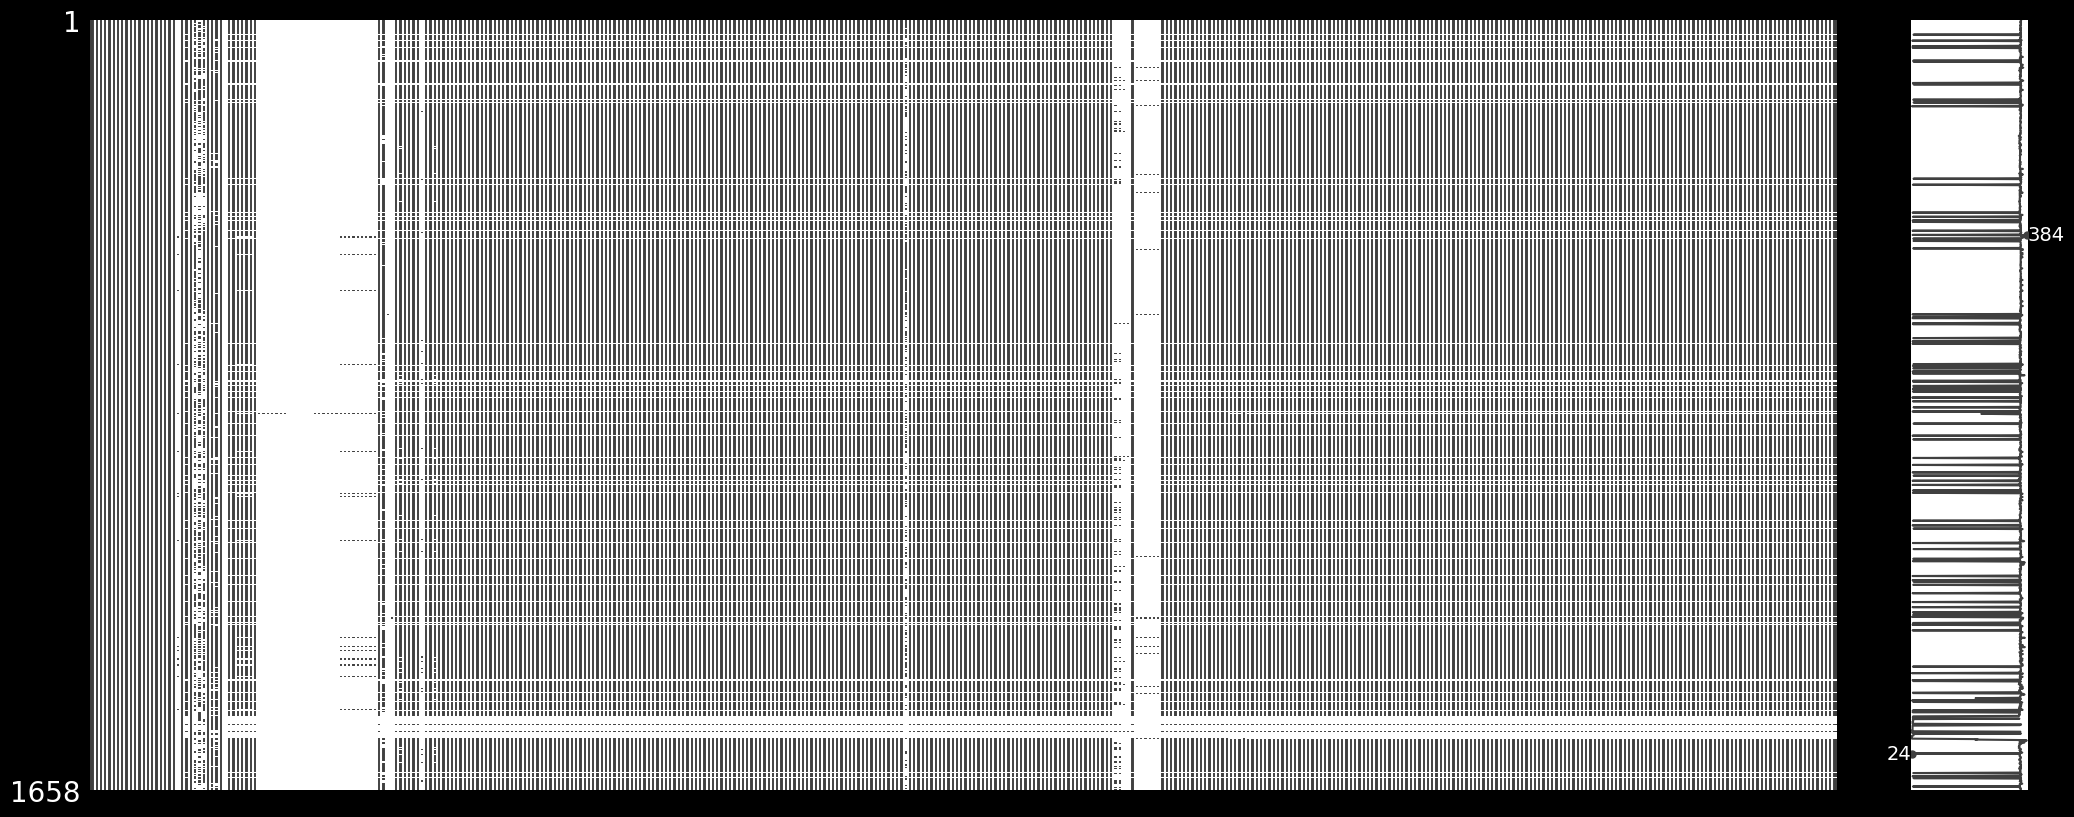

In [95]:
# visualização da matriz do dataset
ms.matrix(ds_censo)

(1476, 408)
<class 'pandas.core.frame.DataFrame'>
Index: 1476 entries, 0 to 1657
Columns: 408 entries, NU_ANO_CENSO to QT_TUR_MED_INT
dtypes: float64(379), int64(14), object(15)
memory usage: 4.6+ MB
None


<Axes: >

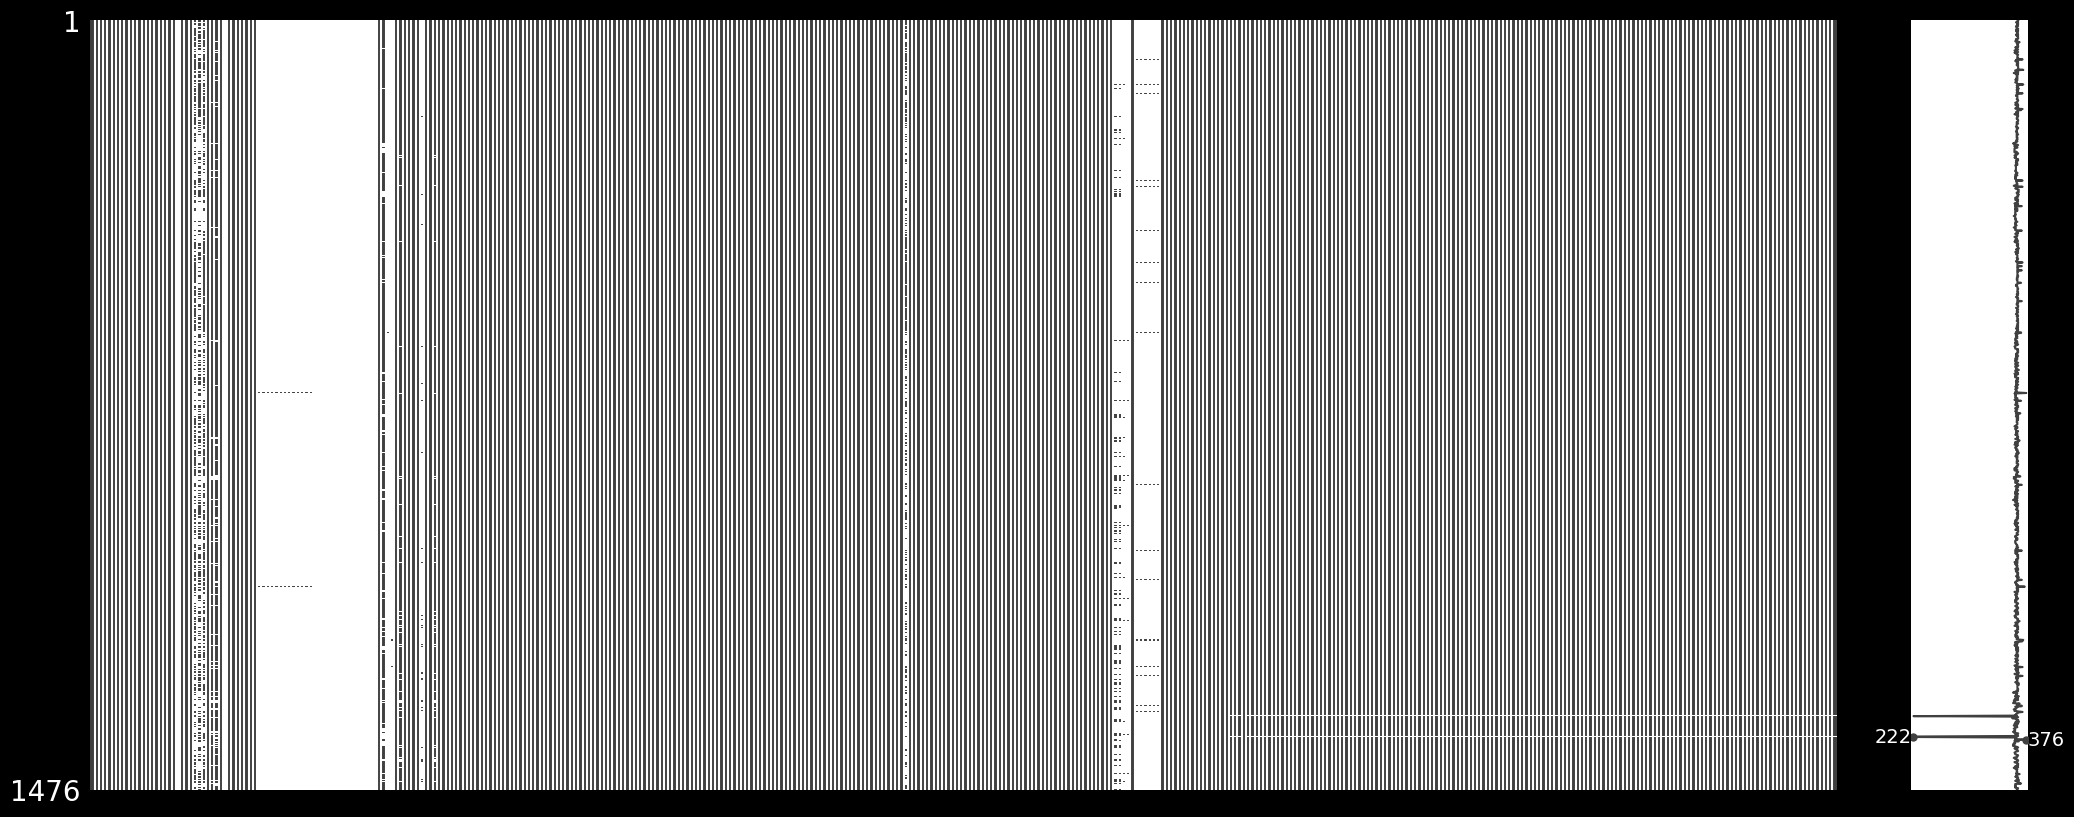

In [96]:
# excluindo escolas privadas (valor == 4) da coluna 'TP_DEPENDENCIA'
ds_censo = ds_censo[ds_censo['TP_DEPENDENCIA'] != 4]

# selecionando somente as escolas ativas (valor == 1) da coluna 'TP_SITUACAO_FUNCIONAMENTO'
ds_censo = ds_censo[ds_censo['TP_SITUACAO_FUNCIONAMENTO'] == 1]

# não foi preciso excluir as linhas com dados faltantes
# ds_censo = ds_censo.dropna(how='all', inplace=True)

# verificando a nova matriz
print(ds_censo.shape)
print(ds_censo.info())
ms.matrix(ds_censo)

### Exploração do *dataset* do Catálogo de Escolas do Inep

**VAR**: Note que o tratamento dos dados do censo escolar conferem com os dados do catálogo de escolas do Inep, que já havia sido obtido com os filtros citados acima (escolas públicas ativas).  

In [97]:
# exploração do Catálago de Escolas do Inep
print(ds_inep.shape)
print(ds_inep.info())

(1476, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Restrição de Atendimento                  1476 non-null   object 
 1   Escola                                    1476 non-null   object 
 2   Código INEP                               1476 non-null   int64  
 3   UF                                        1476 non-null   object 
 4   Município                                 1476 non-null   object 
 5   Localização                               1476 non-null   object 
 6   Localidade Diferenciada                   1476 non-null   object 
 7   Categoria Administrativa                  1476 non-null   object 
 8   Endereço                                  1476 non-null   object 
 9   Telefone                                  1339 non-null   object 
 10  Dependência Administrativ

<Axes: >

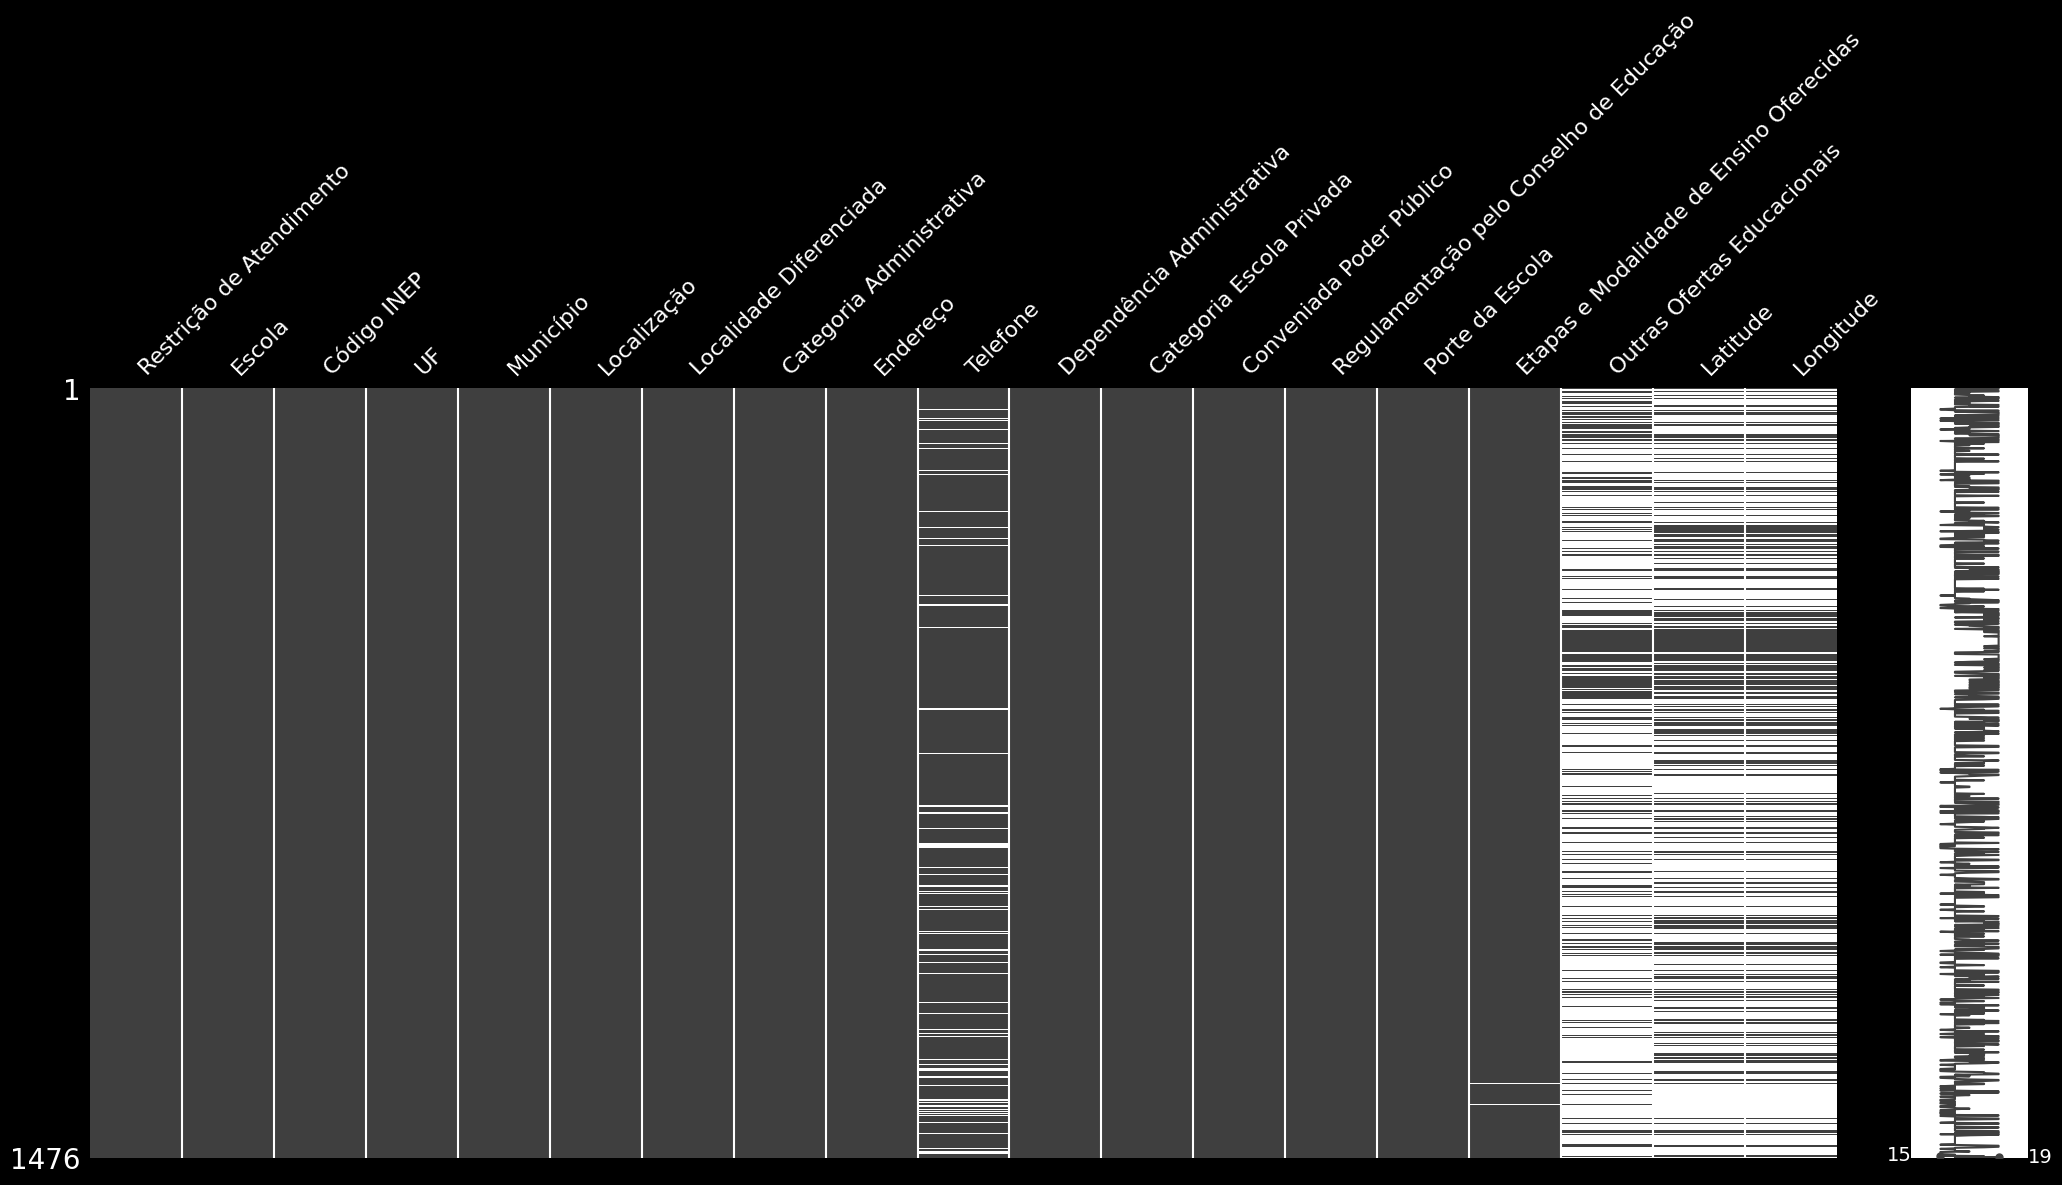

In [98]:
# matriz do Catálogo de Escolas do Inep
ms.matrix(ds_inep)

Logo, é possível afirmar que o Estado do Acre possui **1476 escolas públicas, municipais e estaduais, ativas**, de acordo com os dados do censo escolar.

### Exploração do *dataset* das Unidades Executoras do FNDE

Agora é a vez do *dataset* do cadastro das Unidades Executoras (UEx) obtido junto ao FNDE. Este *dataset* foi obtido aplicando filtros para selecionar as UEx de escolas públicas ativas municipais e estaduais localizadas no Estado do Acre.

In [99]:
# exploração do Cadastro das UEx
print(ds_uex.shape)
print(ds_uex.info())

(1391, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  1391 non-null   int64  
 1   Região               1391 non-null   object 
 2   UF                   1391 non-null   object 
 3   Municipio            1391 non-null   object 
 4   CNPJ EEX             1391 non-null   int64  
 5   Código Escola        1391 non-null   int64  
 6   Escola               1391 non-null   object 
 7   Localização          1391 non-null   object 
 8   CNPJ UEX             1391 non-null   int64  
 9   Razão Social         1391 non-null   object 
 10  DDD Telefone         1343 non-null   float64
 11  Telefone             1343 non-null   float64
 12  Email                0 non-null      float64
 13  Rede de Atendimento  1391 non-null   object 
 14  Mandato Dirigente    1391 non-null   object 
 15  Data Fim do Mandato  1072 n

<Axes: >

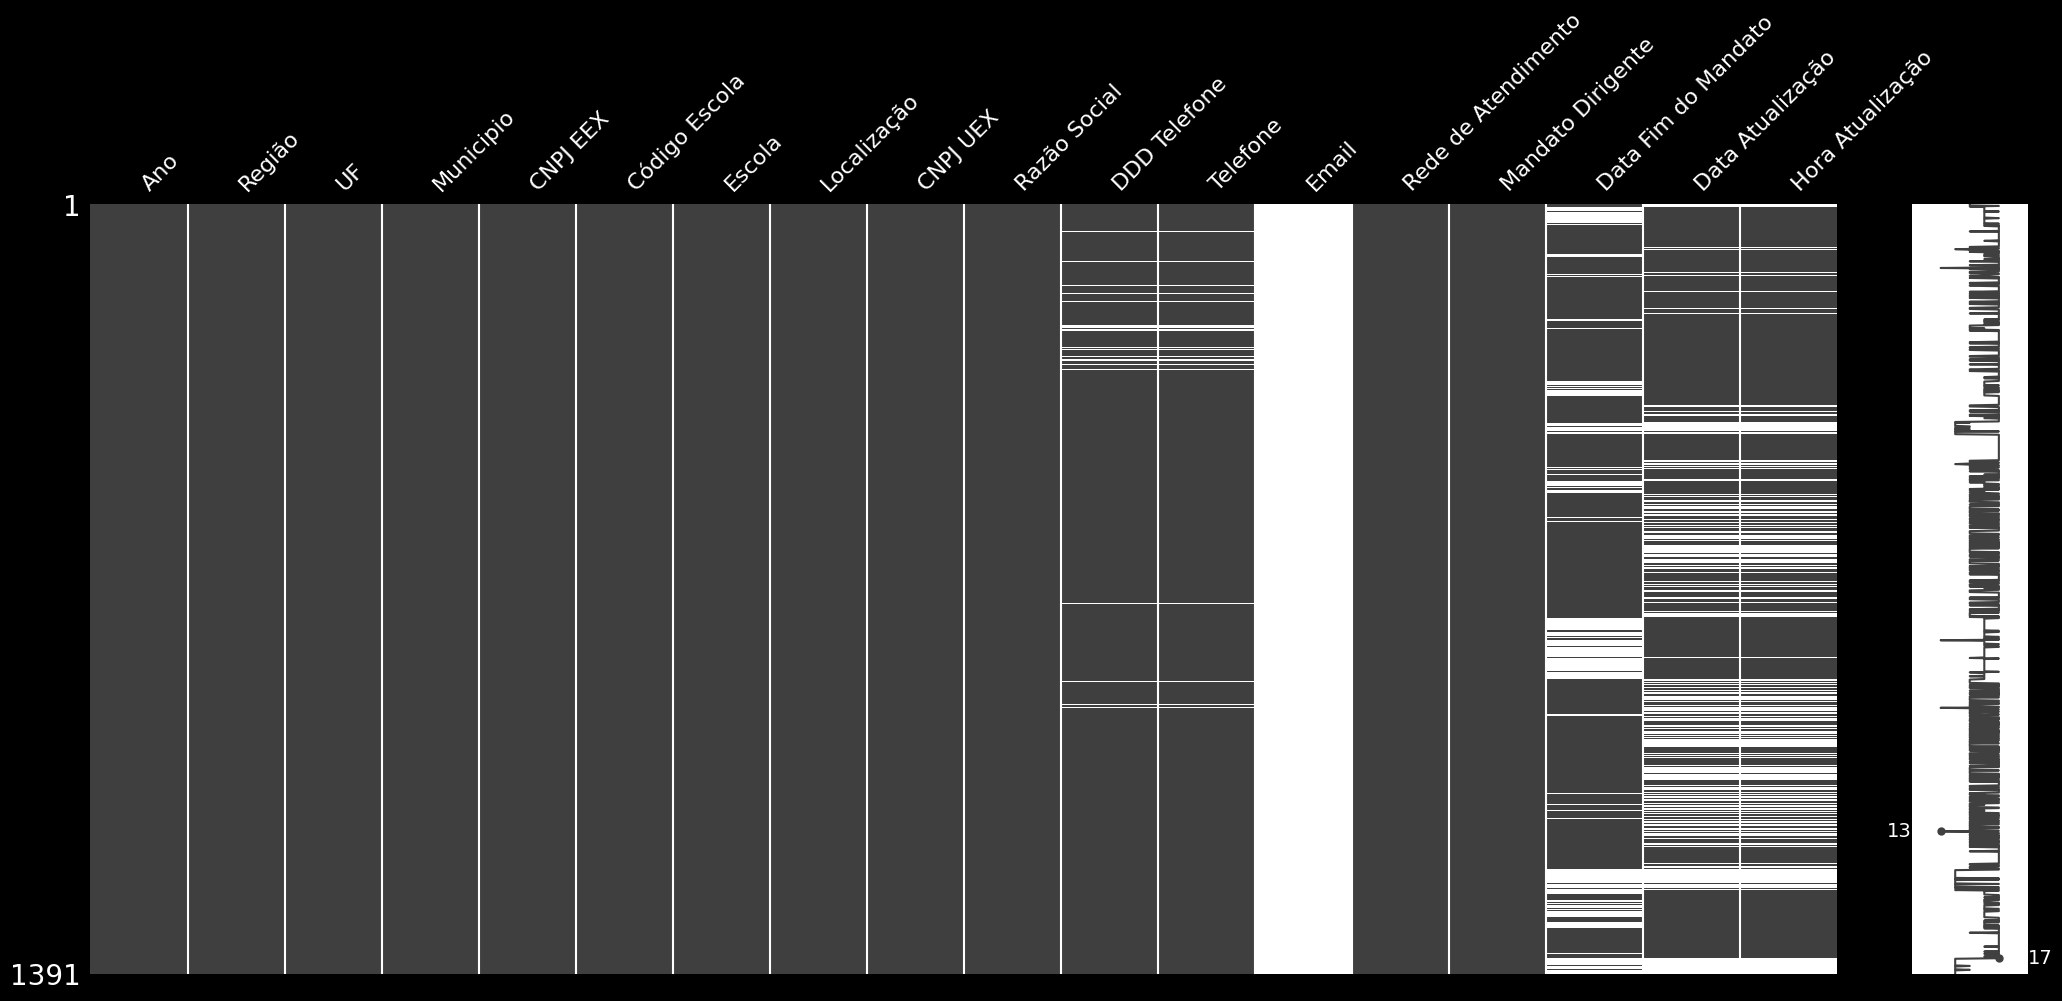

In [100]:
# matriz do Cadastro das UEx
ms.matrix(ds_uex)

O *dataset* não possui linhas nulas e não necessita de tratamento. A diferença entre o número total de escolas ativas que constam do censo escolar e de UEx ativas será problematizado adiante. Por hora, basta o destaque.

# Urbano vs. Rural

A exploração dos dados seguirá a ênfase elaborada na contextualização a respeito das condições socioambientais da amazônia acreana, na qual o ensino escolar público se desenrola. Para tanto, basta um gráfico de barras comparando o número de escolas urbanas e rurais contidas na coluna 'TP_LOCALIZACAO', variável categórica onde o valor 1 se refere à urbana e o valor 2 à rural, segundo o dicionário de dados do Censo Escolar.

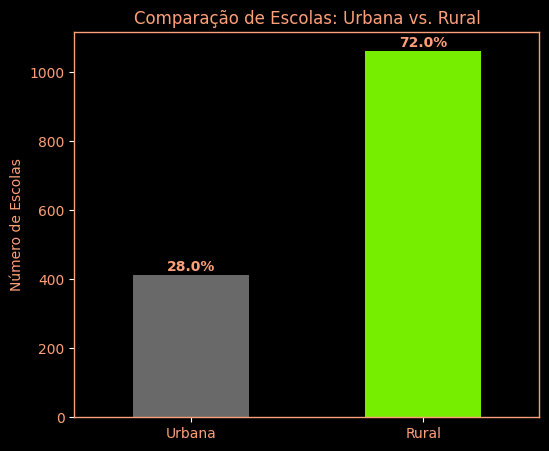

Total de escolas urbanas e rurais
 TP_LOCALIZACAO
1     413
2    1063
dtype: int64


In [101]:
# Conta a quantidade de escolas urbanas e rurais
localizacao_counts = ds_censo['TP_LOCALIZACAO'].value_counts()

# Reordena os índices: '1' para 'Urbana' e '2' para 'Rural'
localizacao_counts = localizacao_counts.sort_index()

# Renomeia os índices: 1 para 'Urbana' e 2 para 'Rural'
localizacao_counts.index = ['Urbana', 'Rural']

# Calcula a porcentagem de cada localização
total_escolas = localizacao_counts.sum()
porcentagens = (localizacao_counts / total_escolas) * 100

# Experimentei o tema "dark"
plt.style.use('dark_background')

# Cria o gráfico
plt.figure(figsize=(6, 5))

# Define tipo do gráfico e cores das barras
bars = localizacao_counts.plot(kind='bar', color=['#696969', '#76EE00'])

# Adiciona título e rótulos. Usei a cor salmão para manter o estilo do Diagrama do Observatório Curica
plt.title('Comparação de Escolas: Urbana vs. Rural', color='#FFA07A')
# plt.xlabel('Localização', color='#FFA07A')
plt.ylabel('Número de Escolas', color='#FFA07A')

# Altera a cor das bordas (spines)
ax = plt.gca()
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a espessura das linhas
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Ajusta as cores dos ticks
plt.xticks(color='#FFA07A', rotation=0)
plt.yticks(color='#FFA07A')

# Insere as porcentagens dentro das barras
for i, valor in enumerate(localizacao_counts):
    plt.text(i, valor + 10, f'{porcentagens[i]:.1f}%', ha='center', color='#FFA07A', fontweight='bold')

# Exibe o gráfico
plt.show()

# Total de escolas urbanas e rurais
print('Total de escolas urbanas e rurais\n', ds_censo.groupby('TP_LOCALIZACAO').size())

A maior proporção de escolas rurais segue a contextualização realizada acima, onde a grande extensão territorial impõe a criação de um maior número de escolas rurais para atender as populações tradicionais que habitam esse espaço.

# Água potável nas escolas públicas

É interessante pensar que o acesso à água potável na Amazônia, uma das maiores concentrações de água doce do planeta, possa ser um problema de saúde pública crônico ([ANA, 2024](https://www.gov.br/ana/pt-br/assuntos/gestao-das-aguas/panorama-das-aguas/regioes-hidrograficas/regiao-hidrografica-amazonica)). Entretanto, essa é a realidade das periferias urbanas da amazônia e das comunidades afastadas dessas cidades. Como explicado acima, o "ensino rural" trabalha com uma grande diversidade socioambiental, onde estão genericamente incluídas os povos indígenas e as comunidades não indígenas ribeirinhas, extrativistas e colonos residentes em projetos de assentamento da reforma agrária.  
  
As escolas da zona urbana são melhores atendidas neste quesito, em comparação com as escolas rurais. Nestas, é muito comum a escola utilizar para o seu abastecimento águas provenientes diretamente dos rios e igarapés ou de poços rasos superficiais, também chamados de "poço amazônico" ou "cacimba". Esta última é a terminologia empregada pelo censo escolar. Essas fontes de abastecimento fornecem água imprópria para o consumo. Ainda, com a chegada da estação seca, agravada por um contexto de crise climática, os rios e igarapés têm tido redução drástica em seu volume de água e as cacimbas secam por completo, deixando as comunidades e escolas em situação de [crise hídrica](https://g1.globo.com/ac/acre/noticia/2024/08/11/cidade-isolada-no-acre-sofre-com-baixo-nivel-do-rio-jurua-gasolina-chega-a-r-1050-o-litro.ghtml).

O primeiro passo para a análise é selecionar as colunas de interesse dentro do *dataset* do censo escolar. Para a temática do acesso à água potável, são relevantes o nome do Município, o código INEP da escola, a localização, se é prédio próprio, se possui água potável e qual a fonte de abastecimento. Saber se a escola possui energia elétrica também é importante, para decidir qual o tipo de equipamento de bombeamento de água necessário para a captação. O número total de alunos, além de melhorar o contexto, também será necessário para a análise.
Embora seja desnecessária a criação de um novo *dataset* específico para analisar os dados relativos à água potável, a criação explícita da lista auxilia visualmente na compreensão do problema e otimiza recursos.

In [102]:
# Lista das colunas do novo dataset 'ds_agua'
colunas_agua = [
    'SG_UF', 'NO_MUNICIPIO', 'CO_MUNICIPIO', 'NO_ENTIDADE', 'CO_ENTIDADE',
    'TP_DEPENDENCIA', 'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA',
    'DS_ENDERECO', 'TP_OCUPACAO_PREDIO_ESCOLAR',
    'IN_PREDIO_COMPARTILHADO', 'IN_AGUA_POTAVEL', 'IN_AGUA_REDE_PUBLICA',
    'IN_AGUA_POCO_ARTESIANO', 'IN_AGUA_CACIMBA', 'IN_AGUA_FONTE_RIO',
    'IN_AGUA_INEXISTENTE', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL',
    'IN_ENERGIA_RENOVAVEL', 'IN_ENERGIA_INEXISTENTE', 'QT_MAT_BAS'
]

# Criando o novo dataset 'ds_agua' com as colunas selecionadas
ds_agua = ds_censo[colunas_agua].copy()

# Verificando
print(ds_agua.shape)
print(ds_agua.head(0))
print(ds_agua.info())

(1476, 22)
Empty DataFrame
Columns: [SG_UF, NO_MUNICIPIO, CO_MUNICIPIO, NO_ENTIDADE, CO_ENTIDADE, TP_DEPENDENCIA, TP_LOCALIZACAO, TP_LOCALIZACAO_DIFERENCIADA, DS_ENDERECO, TP_OCUPACAO_PREDIO_ESCOLAR, IN_PREDIO_COMPARTILHADO, IN_AGUA_POTAVEL, IN_AGUA_REDE_PUBLICA, IN_AGUA_POCO_ARTESIANO, IN_AGUA_CACIMBA, IN_AGUA_FONTE_RIO, IN_AGUA_INEXISTENTE, IN_ENERGIA_REDE_PUBLICA, IN_ENERGIA_GERADOR_FOSSIL, IN_ENERGIA_RENOVAVEL, IN_ENERGIA_INEXISTENTE, QT_MAT_BAS]
Index: []

[0 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1476 entries, 0 to 1657
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SG_UF                        1476 non-null   object 
 1   NO_MUNICIPIO                 1476 non-null   object 
 2   CO_MUNICIPIO                 1476 non-null   int64  
 3   NO_ENTIDADE                  1476 non-null   object 
 4   CO_ENTIDADE                  1476 non-null   int64  
 5  

## Panomarama do fornecimento de água potável nas escolas públicas do Estado do Acre

Agora vamos verificar quais escolas informaram no censo a condição do fornecimento de água potável na coluna IN_AGUA_POTAVEL, variável categórica, onde "0" é "Não Fornece" e "1" é "Fornece", segundo o dicionário de dados do censo escolar.

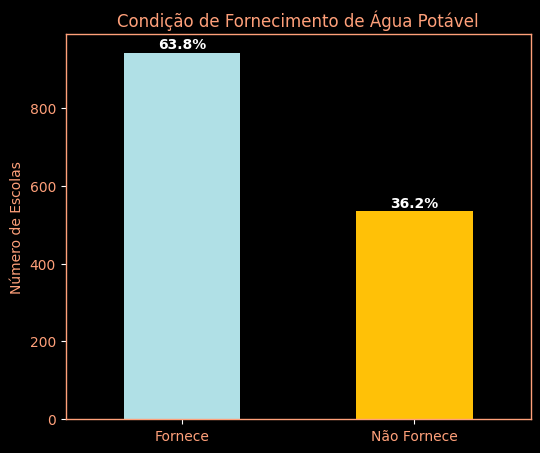


Total de escolas sem água potável: 534


In [103]:
# Seleção e contagem de escolas que marcaram não possuir água potável
total_sem_agua_potavel = (ds_agua['IN_AGUA_POTAVEL'] == 0).sum()

# Agrupa as escolas sem água potável por município
resultado = ds_agua[ds_agua['IN_AGUA_POTAVEL'] == 0].groupby('NO_MUNICIPIO').size()

# Conta as escolas que fornecem e não fornecem água potável
agua_potavel_counts = ds_agua['IN_AGUA_POTAVEL'].value_counts()

# Ordena os valores para que "Fornece" apareça antes de " Não Fornece"
agua_potavel_counts = agua_potavel_counts.sort_index(ascending=False)

# Renomeia os índices para facilitar a leitura no gráfico
agua_potavel_counts.index = ['Fornece', 'Não Fornece']

# Calcula a porcentagem de cada categoria
porcentagens = (agua_potavel_counts / agua_potavel_counts.sum()) * 100

# tema "dark"
plt.style.use('dark_background')

# Cria o gráfico de barras
plt.figure(figsize=(6, 5))

# Cores amarelo fosco para "Não Fornece" e azul claro fosco para "Fornece"
bars = agua_potavel_counts.plot(kind='bar', color=['#B0E0E6', '#FFC107'])

# Adiciona título e rótulos com cores claras para o fundo escuro
plt.title('Condição de Fornecimento de Água Potável', color='#FFA07A')
plt.ylabel('Número de Escolas', color='#FFA07A')

# Altera a cor das bordas (spines)
ax = plt.gca()
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a espessura das linhas
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Ajusta as cores dos ticks
plt.xticks(color='#FFA07A', rotation=0)
plt.yticks(color='#FFA07A')

# Insere as porcentagens
for i, valor in enumerate(agua_potavel_counts):
    plt.text(i, valor + 10, f'{porcentagens[i]:.1f}%', ha='center', color='white', fontweight='bold')

# Exibe o gráfico
plt.show()

# Exibe o total de escolas sem água potável
print(f'\nTotal de escolas sem água potável: {total_sem_agua_potavel}')

Nesta primeira análise, tem-se que das 1476 escolas do Estado, 534 não fornecem água potável a seus alunos.  
Agora é possível aprofundar a análise para discriminar a situação em cada Município do Estado.

## Panorama do fornecimento de água potável em escolas públicas por Município

Aqui serão discriminados o total de escolas que não fornecem água potável, agrupados por Município.

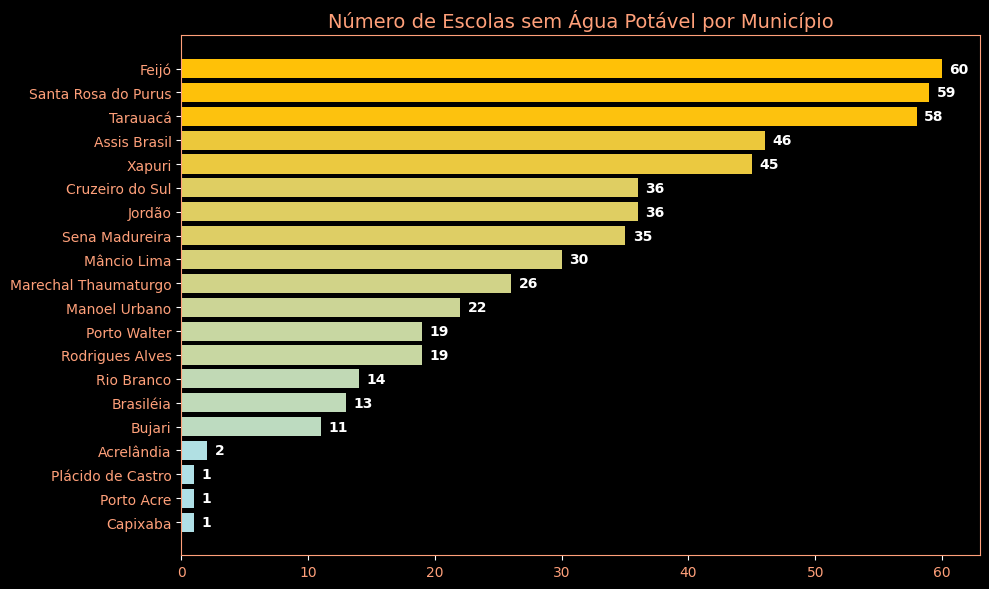

In [104]:
# Filtra escolas que não fornecem água potável e agrupa por município, contando as escolas
escolas_sem_agua_potavel = ds_agua[ds_agua['IN_AGUA_POTAVEL'] == 0]
resultado = escolas_sem_agua_potavel.groupby('NO_MUNICIPIO').size()

# Ordena os dados em ordem crescente
resultado = resultado.sort_values(ascending=True)

# Define o gradiente mantendo o estilo do gráfico anterior
cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#B0E0E6', '#FFC107'])

# Normaliza os valores para o gradiente
norm = plt.Normalize(vmin=resultado.min(), vmax=resultado.max())

# Aplica o gradiente
cores = [cmap(norm(valor)) for valor in resultado]

# Configura o tema "dark"
plt.style.use('dark_background')

# Cria o gráfico
plt.figure(figsize=(10, 6))

# Plota o gráfico de barras horizontal
bars = plt.barh(resultado.index, resultado.values, color=cores)

# Adiciona título e rótulos
plt.title('Número de Escolas sem Água Potável por Município', color='#FFA07A', fontsize=14)

# Altera a cor dos spines
ax = plt.gca()  # Obtém o eixo atual
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a cor dos ticks
plt.xticks(color='#FFA07A', fontsize=10)
plt.yticks(color='#FFA07A', fontsize=10)

# Insere os valores totais em cada barra
for i, valor in enumerate(resultado):
    plt.text(valor + (resultado.max() * 0.01), i, str(valor), va='center', color='white', fontweight='bold')

# Ajusta layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


Essa exploração preliminar fornece um panorama geral do défict de fornecimento de água potável nas escolas acreanas e alerta para a necessidade de intervenção das Promotorias de Justiça nesta política pública.  
  
Entretanto, a fim de auxiliar as Promotorias para uma atuação mais eficiente, é necessário problematizar as inconsistências do censo escolar, apontando possibilidades de intervenção imediata ou que necessitam de verificação das informações.

# Problematização dos dados do censo escolar

Em uma primeira análise, de um total de 1476 escolas, 534, mais de um terço, declaram não oferecer água potável.  
Para melhor orientar o trabalho das Promotorias de Justiça, o passo seguinte é encontrar as possíveis inconsistências de preenchimento do censo escolar, partindo das seguintes premissas constatadas em campo:
* escolas urbanas possuem facilidade de conexão com a rede de abastecimento de água;
* escolas conectadas à rede de abastecimento possuem água potável;
* escolas abastecidas por poços artesianos possuem água potável;
* escolas abastecidas por cacimbas, cisternas ou água do rio não possuem água potável.


## Escolas urbanas que declararam não oferecer água potável

De regra, as escolas urbanas são facilmente conectadas à rede pública de abastecimento de água e fornecem água potável. Entretanto, algumas delas declaram ao censo escolar que não fornecem água potável.

In [105]:
# Filtra as escolas urbanas sem água potável
escolas_urbanas_sem_agua = escolas_sem_agua_potavel[escolas_sem_agua_potavel['TP_LOCALIZACAO'] == 1]

# Ordena as escolas urbanas por Município
escolas_urbanas_sem_agua_municipio = escolas_urbanas_sem_agua.sort_values(by='NO_MUNICIPIO')

# Filtra as escolas rurais sem água potável
escolas_rurais_sem_agua = escolas_sem_agua_potavel[escolas_sem_agua_potavel['TP_LOCALIZACAO'] == 2]

# Imprime o número total de escolas urbanas sem água potável
print(f'Total de escolas urbanas que declararam não oferecer água potável: {len(escolas_urbanas_sem_agua)}\n')

# Discrimina as escolas urbanas sem água potável
print(f"{'NO_MUNICIPIO':<23}{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'NO_ENTIDADE':<15}")
print("-" * 114)

# Mapeamento de 'TP_DEPENDENCIA' para valores "Estadual" e "Municipal", segundo o censo escolar
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4:'Privada'}

# Discrimina as escolas urbanas que declararam não oferecer água potável
for index, row in escolas_urbanas_sem_agua_municipio.iterrows():
    dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
    print(f"{row['NO_MUNICIPIO']:<23}{row['CO_ENTIDADE']:<15}{dependencia:<15}{row['NO_ENTIDADE']:<30}")


Total de escolas urbanas que declararam não oferecer água potável: 25

NO_MUNICIPIO           CO_ENTIDADE    TP_DEPENDENCIA NO_ENTIDADE    
------------------------------------------------------------------------------------------------------------------
Acrelândia             12020613       Municipal      ESC BRANCA DE NEVE            
Cruzeiro do Sul        12031496       Estadual       ESC CENTRO DE EDUCACAO PROFISSIONAL E TECNOLOGICA DO JURUA - CEFLORA
Cruzeiro do Sul        12029530       Municipal      ESC CRECHE SAO FRANCISCO      
Cruzeiro do Sul        12028665       Municipal      ESC IRMA DIANA                
Feijó                  12003930       Estadual       ESC NANZIO MAGALHAES          
Feijó                  12004480       Municipal      ESC INFANTIL TOPPO GIGIO      
Marechal Thaumaturgo   12089222       Municipal      ESC INFANTIL MARIA LUZIA ELIAS DOS SANTOS
Mâncio Lima            12028550       Municipal      ESC CRECHE SONHO INFANTIL     
Mâncio Lima            1

A análise mostra que 25 escolas urbanas declararam ao censo não possuir água potável. Tal informação deve ser prontamente verificada. Se a hipótese for verdadeira, basta a correção da informação no próximo censo. Do contrário, a intervenção da Promotoria é necessária. Essa é a lista das escolas alvo.

## Escolas rurais que declararam estar conectadas à rede pública de abastecimento de água

De regra, as escolas rurais estão distantes das redes públicas de abastecimento. A exceção é quando a escola se localiza em uma comunidade, vila ou aldeia que dispõe de rede pública de abastecimento equipada com poço artesiano.  
Esta situação também é uma possível inconsistência que deve ser verificada. Segue a relação das escolas.


In [106]:
# Filtra escolas rurais ()'TP_LOCALIZACAO'] == 2) que declararam estar conectadas à rede pública de abastecimento (IN_AGUA_REDE_PUBLICA == 1)
escolas_rurais_rede_publica_agua = ds_agua[
    (ds_agua['TP_LOCALIZACAO'] == 2) &
    (ds_agua['IN_AGUA_REDE_PUBLICA'] == 1)
]

# Ordena por Município
escolas_rurais_rede_publica_municipio = escolas_rurais_rede_publica_agua.sort_values(by='NO_MUNICIPIO')

# Imprime o número total escolas rurais conectadas à rede pública de abastecimento
print(f'Total de escolas rurais conectadas à rede pública de abastecimento: {len(escolas_rurais_rede_publica_agua)}\n')

# Discrimina as escolas rurais que declararam estar conectadas à rede pública de abastecimento
print(f"{'NO_MUNICIPIO':<23}{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'NO_ENTIDADE':<30}")
print("-" * 114)

# Mapeamento de 'TP_DEPENDENCIA' para valores "Estadual" e "Municipal", segundo o censo escolar
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4:'Privada'}

# Discrimina as escolas rurais que declaram estar conectadas à rede pública de abastecimento
for index, row in escolas_rurais_rede_publica_municipio.iterrows():
    dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
    print(f"{row['NO_MUNICIPIO']:<23}{row['CO_ENTIDADE']:<15}{dependencia:<15}{row['NO_ENTIDADE']:<30}")


Total de escolas rurais conectadas à rede pública de abastecimento: 42

NO_MUNICIPIO           CO_ENTIDADE    TP_DEPENDENCIA NO_ENTIDADE                   
------------------------------------------------------------------------------------------------------------------
Cruzeiro do Sul        12000159       Estadual       ESC 7 DE SETEMBRO             
Cruzeiro do Sul        12030031       Estadual       ESC INDIGENA PEDRO DE SOUZA WANINAWA
Cruzeiro do Sul        12026492       Municipal      ESC CRECHE SANTA ROSA         
Cruzeiro do Sul        12023256       Estadual       ESC INDIGENA FRANCISCO DE ASSIS SATANAWA
Cruzeiro do Sul        12023248       Estadual       ESC INDIGENA JOAO DAMIAO      
Cruzeiro do Sul        12020664       Estadual       ESC INDIGENA KATUKINA II      
Cruzeiro do Sul        12034380       Estadual       ESC INDIGENA PEO VARINAWA     
Cruzeiro do Sul        12001627       Estadual       ESC VISCONDE DO RIO BRANCO    
Cruzeiro do Sul        12034398       Est

## Escolas que declararam não oferecer água potável e estão conectadas à rede pública de abastecimento

Esta também é uma possível inconsistência que deve ser verificada, pois se presume que a água oferecida pela rede pública de abastecimento é tratada e potável, ou então é proveniente de poços artesianos profundos, no caso de aldeias, vilas ou comunidades. Segue a lista de escolas para verificação de possível inconsistência.

In [107]:
# Filtra escolas conectadas à rede pública de água que declararam não possuir água potável
escolas_rede_publica_sem_agua_potavel = ds_agua[
    (ds_agua['IN_AGUA_REDE_PUBLICA'] == 1) &
    (ds_agua['IN_AGUA_POTAVEL'] == 0)
]

# Ordena por Município
escolas_rede_publica_sem_agua_potavel_municipio = escolas_rede_publica_sem_agua_potavel.sort_values(by='NO_MUNICIPIO')

# Seleciona as escolas rurais
escolas_rede_publica_sem_agua_potavel_rurais = escolas_rede_publica_sem_agua_potavel[escolas_rede_publica_sem_agua_potavel['TP_LOCALIZACAO'] == 2].sort_values(by='NO_MUNICIPIO')

# Imprime o total de escolas
print(f'Total de escolas conectadas à rede pública de abastecimento que declaram não oferecer água potável: {len(escolas_rede_publica_sem_agua_potavel)}\n')

# Imprime o total de escolas rurais
print(f'Total de escolas rurais conectadas à rede pública de abastecimento que declaram não oferecer água potável: {len(escolas_rede_publica_sem_agua_potavel_rurais)}\n')

# Discrimina as escolas conectadas à rede pública de abastecimento que declararam não fornecer água potável
print(f"{'NO_MUNICIPIO':<23}{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'TP_LOCALIZACAO':<15}{'NO_ENTIDADE':<30}")
print("-" * 114)

# Mapeamento de 'TP_DEPENDENCIA' para valores "Estadual" e "Municipal", segundo o censo escolar
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4:'Privada'}

# Mapeamento de 'TP_LOCALIZACAO' para valores "Urbano" e 'Rural, segundo o censo escolar
localizacao_map = {1: 'Urbana', 2: 'Rural'}

# Discrimina as escolas que declararam não oferecer água potável e estão conectadas à rede pública de abastecimento
for index, row in escolas_rede_publica_sem_agua_potavel_municipio.iterrows():
    dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
    localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
    print(f"{row['NO_MUNICIPIO']:<23}{row['CO_ENTIDADE']:<15}{dependencia:<15}{localizacao:<15}{row['NO_ENTIDADE']:<30}")


Total de escolas conectadas à rede pública de abastecimento que declaram não oferecer água potável: 26

Total de escolas rurais conectadas à rede pública de abastecimento que declaram não oferecer água potável: 13

NO_MUNICIPIO           CO_ENTIDADE    TP_DEPENDENCIA TP_LOCALIZACAO NO_ENTIDADE                   
------------------------------------------------------------------------------------------------------------------
Acrelândia             12020613       Municipal      Urbana         ESC BRANCA DE NEVE            
Cruzeiro do Sul        12000248       Municipal      Rural          ESC ANTONIO FERREIRA GOMES    
Cruzeiro do Sul        12034380       Estadual       Rural          ESC INDIGENA PEO VARINAWA     
Cruzeiro do Sul        12030031       Estadual       Rural          ESC INDIGENA PEDRO DE SOUZA WANINAWA
Cruzeiro do Sul        12028665       Municipal      Urbana         ESC IRMA DIANA                
Cruzeiro do Sul        12023256       Estadual       Rural          ES

## Escolas equipadas com poço artesiano que declararam não fornecer água potável

Com explicado acima, os poços artesianos permitem o fornecimento de água potável e há muitas escolas que possuem esta solução implementada. A captação de águas subterrâneas é uma alternativa de baixo custo e complexidade, quando comparada ao tratamento de águas superficiais. Entretanto, em certas localidades, é possível que a perfuração atinja estratos do solo que possuem grande quantidade de sais, o que torna a água salobra e imprópria para consumo. A declaração de que a escola fornece água de poço artesiano e que não é potável é situação que deve ser averiguada.

In [108]:
# Filtra escolas que utilizam poço artesiano (IN_AGUA_POCO_ARTESIANO == 1) e que declararam não fornecer água potável (IN_AGUA_POTAVEL == 0)
escolas_poco_artesiano_sem_agua_potavel = ds_agua[
    (ds_agua['IN_AGUA_POCO_ARTESIANO'] == 1) &
    (ds_agua['IN_AGUA_POTAVEL'] == 0)
]

# Ordena por Município
escolas_poco_artesiano_municipio = escolas_poco_artesiano_sem_agua_potavel.sort_values(by='NO_MUNICIPIO')

# Imprime total de escolas que declaram fornecer água de poço artesiano não potável
print(f'Total de escolas com poço artesiano que declaram não oferecer água potável: {len(escolas_poco_artesiano_sem_agua_potavel)}\n')

# Discrimina as escolas que declararam usar poço artesiano como fonte de abastecimento e não fornecem água potável
print(f"{'NO_MUNICIPIO':<23}{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'TP_LOCALIZACAO':<15}{'NO_ENTIDADE':<30}")
print("-" * 114)

# Mapeamento de 'TP_DEPENDENCIA' para valores "Federal", "Estadual", "Municipal" e "Privada", segundo o censo escolar
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}

# Mapeamento de 'TP_LOCALIZACAO', segundo o censo escolar
localizacao_map = {1: 'Urbana', 2: 'Rural'}

# Discrimina as escolas com poço artesiano que declararam não fornecer água potável
for index, row in escolas_poco_artesiano_municipio.iterrows():
    dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
    localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
    print(f"{row['NO_MUNICIPIO']:<23}{row['CO_ENTIDADE']:<15}{dependencia:<15}{localizacao:<15}{row['NO_ENTIDADE']:<30}")


Total de escolas com poço artesiano que declaram não oferecer água potável: 44

NO_MUNICIPIO           CO_ENTIDADE    TP_DEPENDENCIA TP_LOCALIZACAO NO_ENTIDADE                   
------------------------------------------------------------------------------------------------------------------
Cruzeiro do Sul        12000841       Estadual       Rural          ESC INDIGENA KATUKINA I       
Cruzeiro do Sul        12057223       Estadual       Rural          ESC UNIVERSO INFANTIL         
Cruzeiro do Sul        12029530       Municipal      Urbana         ESC CRECHE SAO FRANCISCO      
Cruzeiro do Sul        12031496       Estadual       Urbana         ESC CENTRO DE EDUCACAO PROFISSIONAL E TECNOLOGICA DO JURUA - CEFLORA
Cruzeiro do Sul        12033219       Municipal      Rural          ESC MUNICIPAL JOSE ALVES DE OLIVEIRA
Feijó                  12004928       Municipal      Rural          ESC SAO SEBASTIAO             
Feijó                  12004901       Municipal      Rural          

## Escolas que declararam não possuir fonte de abastecimento ou que são abastecidas por cacimbas ou água do rio e que declaram fornecer água potável

Como explicado acima, a água coletada superficialmente em cacimbas, rios ou igarapés não é potável. A declaração de que a escola fornece água potável proveniente das fontes referidas deve ser corrigida.

In [109]:
# Filtra as escolas rurais que declaram fornecer água potável e cuja fonte de abastecimento provém de cacimbas, rio, ou não possuem água
escolas_fonte_abastecimento = ds_agua[
    (ds_agua['IN_AGUA_POTAVEL'] == 1) &
    (
        (ds_agua['IN_AGUA_CACIMBA'] == 1) |
        (ds_agua['IN_AGUA_FONTE_RIO'] == 1) |
        (ds_agua['IN_AGUA_INEXISTENTE'] == 1)
    )
]

# Ordena por Município
escolas_fonte_abastecimento = escolas_fonte_abastecimento.sort_values(by='NO_MUNICIPIO')

# Seleciona as escolas rurais
escolas_fonte_abastecimento_rurais = escolas_fonte_abastecimento[escolas_fonte_abastecimento['TP_LOCALIZACAO'] == 2].sort_values(by='NO_MUNICIPIO')

# Imprime o total de escolas que atendem as condições
print(f'Total de escolas que declaram fornecer água potável e cujas fontes de abastecimento são cacimbas, rio, ou não possuem abastecimento: {len(escolas_fonte_abastecimento)}\n')

# Imprime o total de escolas urbanas que atendem as condições
print(f'Total de escolas urbanas que declaram fornecer água potável e cujas fontes de abastecimento são cacimbas, rio, ou não possuem abastecimento: {len(escolas_fonte_abastecimento) - len(escolas_fonte_abastecimento_rurais)}\n')

# Imprime o total de escolas rurais que atendem as condições
print(f'Total de escolas rurais que declaram fornecer água potável e cujas fontes de abastecimento são cacimbas, rio, ou não possuem abastecimento: {len(escolas_fonte_abastecimento_rurais)}\n')

# Discrimina as escolas urbanas sem água potável
print(f"{'NO_MUNICIPIO':<23}{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'TP_LOCALIZACAO':<15}{'NO_ENTIDADE':<30}")
print("-" * 114)

# Mapeamento de 'TP_DEPENDENCIA' para valores "Estadual" e "Municipal"
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4:'Privada'}

# Mapeamento de 'TP_LOCALIZACAO' para valores "Urbano" e 'Rural
localizacao_map = {1: 'Urbana', 2: 'Rural'}

# Discrimina as escolas por Município
for index, row in escolas_fonte_abastecimento.iterrows():
    dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
    localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
    print(f"{row['NO_MUNICIPIO']:<23}{row['CO_ENTIDADE']:<15}{dependencia:<15}{localizacao:<15}{row['NO_ENTIDADE']:<30}")


Total de escolas que declaram fornecer água potável e cujas fontes de abastecimento são cacimbas, rio, ou não possuem abastecimento: 411

Total de escolas urbanas que declaram fornecer água potável e cujas fontes de abastecimento são cacimbas, rio, ou não possuem abastecimento: 66

Total de escolas rurais que declaram fornecer água potável e cujas fontes de abastecimento são cacimbas, rio, ou não possuem abastecimento: 345

NO_MUNICIPIO           CO_ENTIDADE    TP_DEPENDENCIA TP_LOCALIZACAO NO_ENTIDADE                   
------------------------------------------------------------------------------------------------------------------
Acrelândia             12128236       Estadual       Rural          ESC FAMILIA AGRICOLA JEAN PIERRE MINGAN
Acrelândia             12018422       Estadual       Rural          ESC SANTA LUCIA III           
Acrelândia             12021768       Estadual       Urbana         ESC MARCILIO PONTES DOS SANTOS
Acrelândia             12009164       Estadual      

A análise apurou um quadro grave de informações inadequadas fornecidas ao censo escolar, com distorção da realidade das condições de fornecimento de água potável nas escolas localizadas no Estado do Acre. 411 escolas informaram oferecer água potável de fontes sabidamente insalubres. Seguindo a premissa de que as escolas urbanas possuem fácil acesso à rede pública de abastecimento, presume-se que suas declarações a respeito de fonte de abastecimento insalubre sejam casos de preenchimento incorreto do censo escolar.  
Entretanto, com relação às escolas rurais, **345** declararam oferecer água potável proveniente de fontes insalubres. Nesse caso, esse filtro revela a possibilidade de subnotificação do quadro de fornecimento de água nessas escolas.  

## Conclusão sobre o quadro de fornecimento de água potável nas escolas da rede pública de ensino no Estado do Acre

Esta análise possui um objetivo prático específico de guiar a atuação das Promotorias de Justiça para intervenção eficiente nesta política pública, oferecendo um caminho preciso a ser percorrido.
A problematização dos dados permitiram especificar ainda mais as intervenções necessárias, de modo a excluir situações que provavelmente são erros no preenchimento e chamar a atenção para casos de possíveis subnotificações.

In [110]:
# Cálculo do total de escolas que não fornecem água potável de acordo com a
# problematização dos dados
total_escolas_sem_agua_potavel = len(ds_agua[ds_agua['IN_AGUA_POTAVEL'] == 0])

# Total de escolas urbanas que declaram não oferecer água potável
escolas_urbanas_sem_agua_potavel = len(
    ds_agua[
        (ds_agua['IN_AGUA_POTAVEL'] == 0) &
        (ds_agua['TP_LOCALIZACAO'] == 1)
    ]
)

# Total de escolas rurais que declaram estar conectadas à rede pública e declaram
# não oferecer água potável
escolas_rurais_rede_publica_agua = len(
    ds_agua[
        (ds_agua['TP_LOCALIZACAO'] == 2) &
        (ds_agua['IN_AGUA_POTAVEL'] == 0) &
        (ds_agua['IN_AGUA_REDE_PUBLICA'] == 1)
    ]
)

# Total de escolas rurais abastecidas por poço artesiano que declaram não oferecer
# água potável
escolas_poco_artesiano_sem_agua_potavel = len(
    ds_agua[
        (ds_agua['TP_LOCALIZACAO'] == 2) &
        (ds_agua['IN_AGUA_POTAVEL'] == 0) &
        (ds_agua['IN_AGUA_POCO_ARTESIANO'] == 1)
    ]
)

# Total de escolas rurais que declaram fornecer água potável e cuja fonte de
# abastecimento provém de cacimbas, rio, ou não possuem fonte de abastecimento
escolas_fonte_abastecimento_insalubre = len(
    ds_agua[
        (ds_agua['IN_AGUA_POTAVEL'] == 1) &
        (ds_agua['TP_LOCALIZACAO'] == 2) &
        (

            (ds_agua['IN_AGUA_CACIMBA'] == 1) |
            (ds_agua['IN_AGUA_FONTE_RIO'] == 1) |
            (ds_agua['IN_AGUA_INEXISTENTE'] == 1)
        )
    ]
)

# Imprime para conferência
print(f'Total de escolas que não fornecem água potável: {total_escolas_sem_agua_potavel}')
print(f'Total de escolas urbanas que não fornecem água potável: {escolas_urbanas_sem_agua_potavel}')
print(f'Total de escolas rurais conectadas à rede pública: {escolas_rurais_rede_publica_agua}')
print(f'Total de escolas rurais com poço artesiano: {escolas_poco_artesiano_sem_agua_potavel}')
print(f'Total de escolas rurais com fontes insalubres: {escolas_fonte_abastecimento_insalubre}')

Total de escolas que não fornecem água potável: 534
Total de escolas urbanas que não fornecem água potável: 25
Total de escolas rurais conectadas à rede pública: 13
Total de escolas rurais com poço artesiano: 36
Total de escolas rurais com fontes insalubres: 345


A título de se formar um panorama geral mais preciso, os dados levantados acima devem ser trabalhados de acordo com a experiência de campo. De início, 534 escolas declararam não ofertar água potável. É prudente retirar desse conjunto as escolas urbanas que declararam não fornecer água potável (25 escolas), as escolas rurais que declararam estarem conectadas à rede pública de abastecimento (26 escolas) e as escolas rurais que declaram fornecer água captada em poço artesiano (36 escolas).  
Entretanto, a estas, devem ser somadas as 345 escolas rurais que erroneamente declararam fornecer água potável de fontes de abastecimento do tipo cacimba ou rios.  

In [111]:
# Cálculo do total de escolas que não fornecem água potável
total_escolas_sem_agua_potavel = ds_agua[ds_agua['IN_AGUA_POTAVEL'] == 0]

# Total de escolas urbanas que declaram não oferecer água potável
escolas_urbanas_sem_agua_potavel = ds_agua[
    (ds_agua['IN_AGUA_POTAVEL'] == 0) & (ds_agua['TP_LOCALIZACAO'] == 1)
]

# Total de escolas rurais conectadas à rede pública que declaram não oferecer água potável
escolas_rurais_rede_publica_agua = ds_agua[
    (ds_agua['TP_LOCALIZACAO'] == 2) &
    (ds_agua['IN_AGUA_POTAVEL'] == 0) &
    (ds_agua['IN_AGUA_REDE_PUBLICA'] == 1)
]

# Total de escolas rurais abastecidas por poço artesiano que não oferecem água potável
escolas_poco_artesiano_sem_agua_potavel = ds_agua[
    (ds_agua['TP_LOCALIZACAO'] == 2) &
    (ds_agua['IN_AGUA_POTAVEL'] == 0) &
    (ds_agua['IN_AGUA_POCO_ARTESIANO'] == 1)
]

# Total de escolas rurais que declaram fornecer água potável mas utilizam fontes insalubres
escolas_fonte_abastecimento_insalubre = ds_agua[
    (ds_agua['IN_AGUA_POTAVEL'] == 1) &
    (ds_agua['TP_LOCALIZACAO'] == 2) &
    (
        (ds_agua['IN_AGUA_CACIMBA'] == 1) |
        (ds_agua['IN_AGUA_FONTE_RIO'] == 1) |
        (ds_agua['IN_AGUA_INEXISTENTE'] == 1)
    )
]

# Exclui as escolas urbanas, rurais conectadas à rede pública e as com poço artesiano
escolas_nao_fornecem_agua = total_escolas_sem_agua_potavel[
    ~total_escolas_sem_agua_potavel.index.isin(escolas_urbanas_sem_agua_potavel.index) &
    ~total_escolas_sem_agua_potavel.index.isin(escolas_rurais_rede_publica_agua.index) &
    ~total_escolas_sem_agua_potavel.index.isin(escolas_poco_artesiano_sem_agua_potavel.index)
]

# Soma as escolas com fontes insalubres após as exclusões
escolas_nao_fornecem_agua = pd.concat([escolas_nao_fornecem_agua, escolas_fonte_abastecimento_insalubre]).drop_duplicates()

# Exibe o novo dataset
print(f"Novo dataset criado com {len(escolas_nao_fornecem_agua)} escolas que não fornecem água potável:")


Novo dataset criado com 805 escolas que não fornecem água potável:


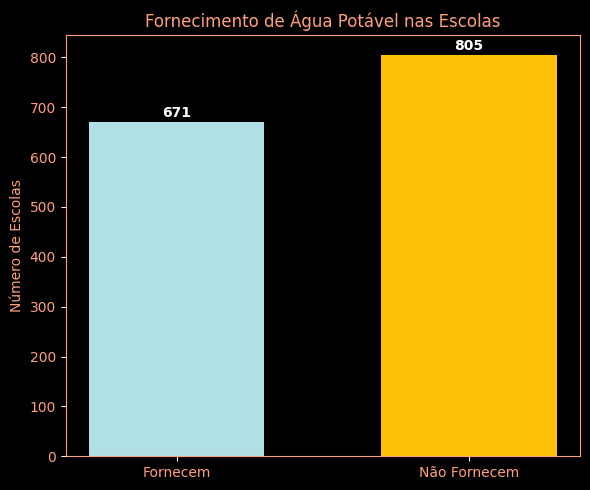

In [112]:
# Criação do gráfico
# Cálculo do total de escolas que fornecem água potável
total_escolas = len(ds_agua)

# Cálculo do total de escolas que não fornecem água potável, conforme o dataset criado
escolas_nao_fornecem_agua_count = len(escolas_nao_fornecem_agua)

# Cálculo do total de escolas que fornecem água potável
escolas_fornecem_agua_count = total_escolas - escolas_nao_fornecem_agua_count

# Preparação dos dados para o gráfico
categorias = ['Fornecem', 'Não Fornecem']
valores = [escolas_fornecem_agua_count, escolas_nao_fornecem_agua_count]

# Tema "dark"
plt.style.use('dark_background')

# Criação do gráfico de barras verticais
plt.figure(figsize=(6, 5))
bars = plt.bar(categorias, valores, width=0.6, align='center', color=['#B0E0E6', '#FFC107'])

# Adiciona título e rótulos
plt.title('Fornecimento de Água Potável nas Escolas', color='#FFA07A')
plt.ylabel('Número de Escolas', color='#FFA07A')

# Altera a cor das bordas (spines)
ax = plt.gca()
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a cor dos ticks
plt.xticks(color='#FFA07A', rotation=0)
plt.yticks(color='#FFA07A')

# Insere os valores nas barras
for i, valor in enumerate(valores):
    plt.text(i, valor + 10, f'{valor}', ha='center', color='white', fontweight='bold')

# Ajusta layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


**Portanto, a análise dos dados do censo escolar do ano de 2023 permite estimar que, das 1476 escolas da rede pública do Estado do Acre, 805 escolas não oferecem água potável para consumo, ou seja, mais da metade delas (54,53%).**  

### Panorama da oferta de água potável pelas escolas, agrupadas por Município

O gráfico abaixo traz as 805 escolas que não oferecem água potável, agrupadas por Município.

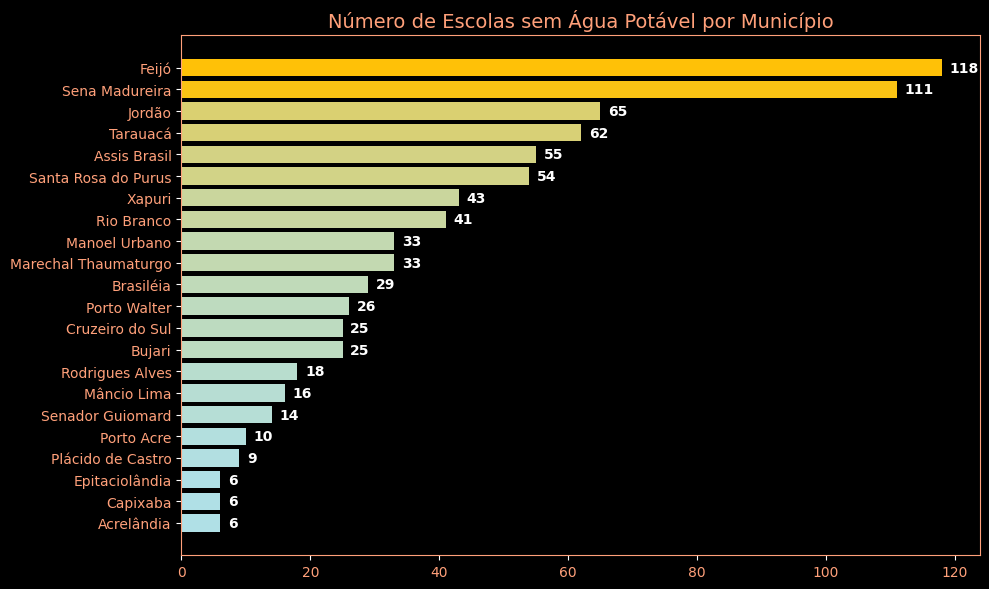

In [113]:
# Agrupa o novo dataset por Município e conta o número de escolas que não fornecem água potável
resultado_municipios = escolas_nao_fornecem_agua.groupby('NO_MUNICIPIO').size()

# Ordena os dados em ordem crescente para melhor visualização
resultado_municipios = resultado_municipios.sort_values(ascending=True)

# Define um gradiente de cores para as barras
cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#B0E0E6', '#FFC107'])

# Normaliza os valores para aplicar o gradiente
norm = plt.Normalize(vmin=resultado_municipios.min(), vmax=resultado_municipios.max())
cores = [cmap(norm(valor)) for valor in resultado_municipios]

# Configura o tema "dark"
plt.style.use('dark_background')

# Cria a figura do gráfico
plt.figure(figsize=(10, 6))

# Plota o gráfico de barras horizontal
bars = plt.barh(resultado_municipios.index, resultado_municipios.values, color=cores)

# Adiciona o título e rótulos
plt.title('Número de Escolas sem Água Potável por Município', color='#FFA07A', fontsize=14)

# Altera a cor das bordas (spines)
ax = plt.gca()  # Obtém o eixo atual
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a cor dos ticks
plt.xticks(color='#FFA07A', fontsize=10)
plt.yticks(color='#FFA07A', fontsize=10)

# Insere os valores totais em cada barra
for i, valor in enumerate(resultado_municipios):
    plt.text(valor + (resultado_municipios.max() * 0.01), i, str(valor), va='center', color='white', fontweight='bold')

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()


A seguir, a análise indicará uma das possíveis causas para este quadro infeliz, ao tempo em que aponta um caminho para a superação do problema.

# PDDE Água

Muitas vezes, ao se endereçar o problema de fornecimento de água potável de uma escola, é possível atender toda a comunidade de seu entorno. Esta é uma política pública de grande impacto social.
  
Nesse rumo, o FNDE disponibiliza o "Programa dinheiro direto na escola" - [PDDE Água](https://www.gov.br/mec/pt-br/areas-de-atuacao/eb/plataforma-pdde-acoes-integradas), que destina recursos financeiros para "garantir o abastecimento de água em condições próprias para o consumo" [(Resolução FNDE nº 2/2021)](https://www.in.gov.br/web/dou/-/resolucao-n-2-de-20-de-abril-de-2021-315695374). Para receber o recurso, a unidade escolar deve:
* localizar-se na zona rural;
* declarar no censo escolar a inexistência de abastecimento de água potável;
* funcionar em prédio próprio;
* possuir Unidade Executora própria (UEx);
* não ter sido beneficiada anteriormente;
* elaborar termo de compromisso.
  
Na prática, as escolas rurais acabam por enfrentar dois impedimentos principais para acessar tal recurso:  
  
O primeiro deles é o erro no preenchimento do censo escolar. Para o acesso ao PDDE Água, a atenção deve recair sobre a localização da escola, sua condição do fornecimento de água potável e se possui prédio prórpio. A análise dos dados do censo escolar demonstra que muitas escolas anotam a condição de água potável a fontes de abastecimento que são impróprias para o consumo, como as cacimbas. Dentro de uma generalização, é possível afirmar que a qualidade da água das cacimbas é melhor que a dos rios e igarapés. Entretanto, não atende os requisitos de potabilidade da [Portaria 888/2021](https://www.in.gov.br/en/web/dou/-/portaria-gm/ms-n-888-de-4-de-maio-de-2021-318461562) do Ministério da Saúde.
  
Para a identificação do problema do preenchimento incorreto do censo escolar, basta listar as escolas que declaram possuir água potável cujas fontes de abastecimento são os rios, igarapés ou cacimbas. Detectado o erro de preenchimento, a Promotoria deve intervir junto à respectiva Secretaria de Educação para corrigir o problema para habilitar a UEx a receber os recursos no ano subsequente.
  
O segundo impedimento é a ausência de unidade executora própria (UEx). Tanto a gestão estadual quanto as municipais recorrem à solução administrativa de criação de "escolas polo" na educação rural indígena e não indígena. As respectivas Secretarias de Educação criam "escolas anexas" a essas escolas polo, somando o número de alunos e servidores desses anexos às escolas polo. Nesta agregação, as escolas anexas não são contabilizadas no censo escolar e não conseguem acessar os recusos do PDDE Água, pois não se constituem em UEx. Somente a escola polo é contabilizada no censo e acaba por acessar este recurso. As demais escolas anexas ficam desatendidas e não é possível identificar esta situação pelo censo escolar, de modo que esses dados não refletem a realidade, violando o direito dos alunos de acesso à água potável.  
  
Para atacar este problema, é possível utilizar a base de dados do FNDE, que possui o cadastro de todas as Uex da rede de ensino alvo. Assim, o cruzamento da base de dados do censo escolar com a base de dados do FNDE permite saber com precisão o número de escolas anexas que existem na zona rural.  
  
De posse dos dados, a Promotoria pode intervir junto à respectiva Secretaria de Educação para a criação da UEx daquela unidade escolar e habilita-la a receber os recursos do PDDE Água. A outra alternativa é o ajuizamento de Ação Civil Pública, demandando o ente para efetivar o fornecimento da água potável com recursos próprios.

## Tratamento dos dados

A análise da execução orçamentária do programa PDDE Água necessita da combinação das informações constantes nos três *datasets* utilizados até aqui, e sua combinação com os dados sobre a execução desse programa em cada unidade escolar localizada no Estado. Esse cruzamento leverá em conta a regulamentação normativa do PDDE Água pelo FNDE para acesso ao recurso.

O objetivo dessa análise é a enumeração das escolas que poderiam acessar o recurso financeiro para solucionar o problema de oferecimento de água potável em suas dependências e não o acessam.

O *dataset* que será carregado foi obtido junto ao site do [PDDE Info](https://www.fnde.gov.br/pddeinfo/pddeinfo/escola/consultar) e traz os dados consolidados de todas as escolas que já acessaram o programa no Estado do Acre.

In [114]:
# carrega o dataset do PDDE Água
url_pdde_agua_ac_total = 'https://raw.githubusercontent.com/L-Honorato/OBS_Curica/main/ds_pdde_agua_ac_total.csv'
ds_pdde_agua_ac_total = pd.read_csv(url_pdde_agua_ac_total, delimiter=';', encoding='utf-8', low_memory=False)

# explorando
print(ds_pdde_agua_ac_total.shape)
print(ds_pdde_agua_ac_total.info())



(156, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Ano                    156 non-null    int64 
 1   Região                 156 non-null    object
 2   UF                     156 non-null    object
 3   Município              156 non-null    object
 4   Código Município IBGE  156 non-null    int64 
 5   CNPJ Município/SEDUC   156 non-null    object
 6   Nome Escola            156 non-null    object
 7   Código Escola          156 non-null    int64 
 8   Rede Atendimento       156 non-null    object
 9   Quantidade Alunos      156 non-null    int64 
 10  CNPJ Executora         156 non-null    object
 11  Nome Executora         156 non-null    object
 12  Programa               156 non-null    object
 13  Destinação             156 non-null    object
 14  Valor Custeio          156 non-null    int64 
 15  Valor Capital

Vê-se que o dataset possui 156 linhas, ou seja, ele informa que, das 1476 escolas, **somente 156 acessaram o programa PDDE Água**.

## Presença de Unidades Executoras

A código abaixo é para relembrarmos o *dataset* que traz informações sobre as Unidades Executoras.


In [115]:
# relembrando o dataset das Unidades Executoras
print(ds_uex.shape)
print(ds_uex.info())

(1391, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  1391 non-null   int64  
 1   Região               1391 non-null   object 
 2   UF                   1391 non-null   object 
 3   Municipio            1391 non-null   object 
 4   CNPJ EEX             1391 non-null   int64  
 5   Código Escola        1391 non-null   int64  
 6   Escola               1391 non-null   object 
 7   Localização          1391 non-null   object 
 8   CNPJ UEX             1391 non-null   int64  
 9   Razão Social         1391 non-null   object 
 10  DDD Telefone         1343 non-null   float64
 11  Telefone             1343 non-null   float64
 12  Email                0 non-null      float64
 13  Rede de Atendimento  1391 non-null   object 
 14  Mandato Dirigente    1391 non-null   object 
 15  Data Fim do Mandato  1072 n

Também é possível afirmar que, de um total de 1476 escolas, 1391 possuem Unidades Executoras.

### Criando o *dataset* com informações sobre Unidades Executoras e PDDE Água

O passo seguinte é combinar os *datasets* para que se possa visualizar as seguintes informações:
* as escolas que acessaram o programa;
* as escolas que poderiam acessar o programa imediatamente e não acessam;
* as escolas que deixam de acessar o programa por erros de preenchimento do censo escolar ou pela falta da criação de Unidade Executora.

In [116]:
# Coloca as colunas 'CO_ENTIDADE' e 'Código Escola' no mesmo formato (string).
ds_agua['CO_ENTIDADE'] = ds_agua['CO_ENTIDADE'].astype(str)
ds_uex['Código Escola'] = ds_uex['Código Escola'].astype(str)
ds_pdde_agua_ac_total['Código Escola'] = ds_pdde_agua_ac_total['Código Escola'].astype(str)

# Cria uma nova coluna 'UEX' no dataset 'ds_agua' com valores == 0 (significa que a escola não possui UEx)
ds_agua['UEX'] = 0

# Percorre as escolas no dataset 'ds_uex' e, para cada uma, busca a escola
# correspondente no 'ds_agua' e define 'UEX' como 1 se for encontrada.
for codigo_escola_uex in ds_uex['Código Escola']:
    ds_agua.loc[ds_agua['CO_ENTIDADE'] == codigo_escola_uex, 'UEX'] = 1

# O mesmo para a coluna 'PDDE_AGUA'
# Cria a coluna 'PDDE_AGUA' no dataset 'ds_agua' com valor padrão de 0 (não recebe PDDE Água)
ds_agua['PDDE_AGUA'] = 0

# Percorre todas as escolas no dataset 'ds_pdde_agua_ac_total'
# e, para cada uma, busca a escola no 'ds_agua' e define 'PDDE_AGUA' como 1.
for codigo_escola_pdde in ds_pdde_agua_ac_total['Código Escola']:
    ds_agua.loc[ds_agua['CO_ENTIDADE'] == codigo_escola_pdde, 'PDDE_AGUA'] = 1

# Verifica se as colunas foram criadas corretamente
print(ds_agua.info())

# Confere se os valores foram inseridos corretamente
print(ds_agua['UEX'].value_counts())
print(ds_agua['PDDE_AGUA'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1476 entries, 0 to 1657
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SG_UF                        1476 non-null   object 
 1   NO_MUNICIPIO                 1476 non-null   object 
 2   CO_MUNICIPIO                 1476 non-null   int64  
 3   NO_ENTIDADE                  1476 non-null   object 
 4   CO_ENTIDADE                  1476 non-null   object 
 5   TP_DEPENDENCIA               1476 non-null   int64  
 6   TP_LOCALIZACAO               1476 non-null   int64  
 7   TP_LOCALIZACAO_DIFERENCIADA  1476 non-null   float64
 8   DS_ENDERECO                  1476 non-null   object 
 9   TP_OCUPACAO_PREDIO_ESCOLAR   1420 non-null   float64
 10  IN_PREDIO_COMPARTILHADO      1420 non-null   float64
 11  IN_AGUA_POTAVEL              1476 non-null   float64
 12  IN_AGUA_REDE_PUBLICA         1476 non-null   float64
 13  IN_AGUA_POCO_ARTESIANO 

A diferença na quantidade de escolas que possuem Unidade Executora quando comparada com os dados do censo escolar reflete o filtro que selecionou somente as escolas públicas estaduais e municipais ativas. Ou seja, existem escolas inativas que ainda possuem Unidades Executoras cadastradas no INEP.

## Escolas que já acessaram o programa

Aqui listaremos as escolas que já acessaram o programa, agrupadas por Município.

In [117]:
# Filtra as escolas que acessaram o PDDE Água (PDDE_AGUA == 1)
escolas_pdde_agua = ds_agua[ds_agua['PDDE_AGUA'] == 1]

# Agrupa as escolas que acessaram o PDDE Água por Município
escolas_pdde_agua_municipio = escolas_pdde_agua.sort_values(by='NO_MUNICIPIO')

# Imprime o total de escolas que acessaram o PDDE Água
print(f'Total de escolas que acessaram o PDDE Água: {len(escolas_pdde_agua)}\n')

# Discrimina as escolas que acessaram o PDDE Água
print(f"{'NO_MUNICIPIO':<23}{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'TP_LOCALIZACAO':<15}{'NO_ENTIDADE':<30}")
print("-" * 114)

# Mapeamento de 'TP_DEPENDENCIA' para valores "Federal", "Estadual", "Municipal" e "Privada"
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}

# Mapeamento de 'TP_LOCALIZACAO' para valores "Urbana" e "Rural"
localizacao_map = {1: 'Urbana', 2: 'Rural'}

# Discrimina as escolas que acessaram o PDDE Água
for index, row in escolas_pdde_agua_municipio.iterrows():
    dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
    localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
    print(f"{row['NO_MUNICIPIO']:<23}{row['CO_ENTIDADE']:<15}{dependencia:<15}{localizacao:<15}{row['NO_ENTIDADE']:<30}")


Total de escolas que acessaram o PDDE Água: 154

NO_MUNICIPIO           CO_ENTIDADE    TP_DEPENDENCIA TP_LOCALIZACAO NO_ENTIDADE                   
------------------------------------------------------------------------------------------------------------------
Brasiléia              12029319       Municipal      Rural          ESC JUELITA MEIRELES          
Brasiléia              12045829       Municipal      Rural          ESC LUIZA ALVES BEZERRA       
Brasiléia              12035424       Municipal      Rural          ESC CAMPO VERDE               
Brasiléia              12016420       Municipal      Rural          ESC GESILDA DE FREITAS PAIXAO 
Brasiléia              12016705       Municipal      Rural          ESC NOVA UNIAO                
Brasiléia              12016845       Municipal      Rural          ESC RAIMUNDA FLORES           
Brasiléia              12016977       Municipal      Rural          ESC SANTA QUITERIA            
Brasiléia              12019828       Munici

De plano, é possível identificar que, das **534 escolas rurais** que declararam ao censo escolar não oferecer água potável, somente **154** inscreveram-se no programa.  
  
O quadro fica ainda mais grave se for levado em consideração o resultado da exploração acima, que identificou 805 escolas sem água potável.

## Verificação das condições de elegibilidade das escolas

Como explicado acima, agora é necessário verificar quais escolas estão elegíveis a receber imediatamente o repasse do programa referido, conforme as condições enumeradas acima.

### Escolas elegíveis para acessar o PDDE Água imediatamente

In [118]:
# Filtra as escolas no dataset ds_agua que preenchem as condições para participar do PDDE Água
escolas_elegiveis_pdde_agua = ds_agua[
    (ds_agua['TP_LOCALIZACAO'] == 2) & # escola rural
    (ds_agua['IN_AGUA_POTAVEL'] == 0) & # sem água potável
    (ds_agua['TP_OCUPACAO_PREDIO_ESCOLAR'] == 1) & # prédio próprio
    (ds_agua['UEX'] == 1) & # possui Unidade Executora
    (ds_agua['PDDE_AGUA'] == 0) # não acessou o PDDE Água anteriormente
]

# imprime o número total de escolas elegíveis a acessar o PDDE Água
print(f'Total de escolas elegíveis a acessar o PDDE Água imediatamente: {len(escolas_elegiveis_pdde_agua)}\n')

# Agrupa o resultado por Município e conta o número de escolas por Município
resultado_agrupado = escolas_elegiveis_pdde_agua.groupby('NO_MUNICIPIO').size()

# Ordena os resultados por número de escolas em ordem decrescente
resultado_agrupado = resultado_agrupado.sort_values(ascending=False)

# Discrimina o total por Município
print(f"{'NO_MUNICIPIO':<25}{'TOTAL ESCOLAS':<15}")
print("-" * 40)
print(resultado_agrupado)


Total de escolas elegíveis a acessar o PDDE Água imediatamente: 314

NO_MUNICIPIO             TOTAL ESCOLAS  
----------------------------------------
NO_MUNICIPIO
Assis Brasil            37
Xapuri                  35
Santa Rosa do Purus     34
Tarauacá                34
Feijó                   25
Mâncio Lima             24
Jordão                  22
Sena Madureira          21
Cruzeiro do Sul         18
Marechal Thaumaturgo    14
Porto Walter            13
Manoel Urbano           11
Rodrigues Alves         11
Bujari                   6
Brasiléia                5
Rio Branco               2
Capixaba                 1
Plácido de Castro        1
dtype: int64


## Escolas potencialmente elegíveis que poderiam acessar o PDDE Água

São as escolas com erros de preenchimento do censo escolar sobre água potável, conforme a problematização elaborada no tópico anterior.

In [119]:
# Condições ajustadas para filtrar as escolas que poderiam acessar o PDDE Água e não acessam
escolas_potenciais_pdde_agua = ds_agua[
    (ds_agua['TP_LOCALIZACAO'] == 2) &  # Escolas rurais
    (ds_agua['PDDE_AGUA'] == 0) &      # Não acessaram o PDDE Água
    (
        # Escolas que não possuem água potável e não são abastecidas por poço artesiano ou rede pública
        (ds_agua['IN_AGUA_POTAVEL'] == 0) &
        (ds_agua['IN_AGUA_POCO_ARTESIANO'] != 1) &
        (ds_agua['IN_AGUA_REDE_PUBLICA'] != 1)
        |
        # Escolas que declaram possuir água potável mas usam fontes impróprias
        (ds_agua['IN_AGUA_POTAVEL'] == 1) &
        (
            (ds_agua['IN_AGUA_CACIMBA'] == 1) |
            (ds_agua['IN_AGUA_FONTE_RIO'] == 1) |
            (ds_agua['IN_AGUA_INEXISTENTE'] == 1)
        )
    )
]

# Agrupa o resultado por Município e conta o número de escolas por Município
resultado_agrupado = escolas_potenciais_pdde_agua.groupby('NO_MUNICIPIO').size()

# Ordena os resultados por número de escolas em ordem decrescente
resultado_agrupado = resultado_agrupado.sort_values(ascending=False)

# Imprime o total de escolas que poderiam acessar o PDDE Água
print(f'Escolas não elegíveis que poderiam acessar o PDDE Água: {len(escolas_potenciais_pdde_agua)}\n')

# Discrimina as escolas que poderiam acessar o PDDE Água, agrupadas por Município
print(f"{'NO_MUNICIPIO':<25}{'TOTAL ESCOLAS':<15}")
print("-" * 40)

for municipio, total in resultado_agrupado.items():
    print(f"{municipio:<25}{total:<15}")

Escolas não elegíveis que poderiam acessar o PDDE Água: 675

NO_MUNICIPIO             TOTAL ESCOLAS  
----------------------------------------
Feijó                    100            
Sena Madureira           96             
Assis Brasil             55             
Santa Rosa do Purus      54             
Tarauacá                 52             
Jordão                   38             
Xapuri                   34             
Manoel Urbano            33             
Rio Branco               27             
Marechal Thaumaturgo     27             
Porto Walter             26             
Bujari                   19             
Brasiléia                18             
Rodrigues Alves          17             
Cruzeiro do Sul          16             
Mâncio Lima              15             
Senador Guiomard         14             
Porto Acre               9              
Plácido de Castro        7              
Epitaciolândia           6              
Capixaba                 6           

## Gráfico comparativo entre as escolas que acessaram o PDDE Água com as que poderiam acessar

O gráfico abaixo faz a comparação entre os três grupos de escolas discutidos acima: as escolas que já captaram o recurso, as escolas elegíveis imediatamente para captar o recurso e aquelas potenciais, que poderiam captar o recurso ao preencher corretamente os dados do censo escolar.

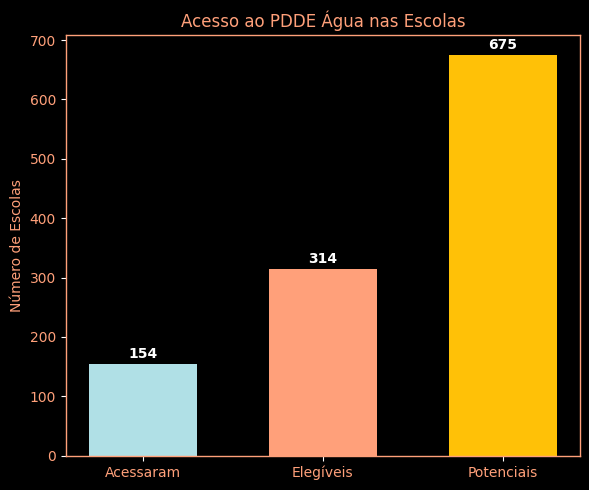

In [120]:
# Valores para o gráfico
escolas_pdde_acessaram = len(escolas_pdde_agua)
escolas_pdde_elegiveis = len(escolas_elegiveis_pdde_agua)
escolas_pdde_potenciais = len(escolas_potenciais_pdde_agua)

# Preparação dos dados
categorias = ['Acessaram', 'Elegíveis', 'Potenciais']
valores = [escolas_pdde_acessaram, escolas_pdde_elegiveis, escolas_pdde_potenciais]

# Tema "dark"
plt.style.use('dark_background')

# Criação do gráfico de barras verticais
plt.figure(figsize=(6, 5))
bars = plt.bar(categorias, valores, width=0.6, align='center', color=['#B0E0E6', '#FFA07A', '#FFC107'])

# Adiciona título e rótulos
plt.title('Acesso ao PDDE Água nas Escolas', color='#FFA07A')
plt.ylabel('Número de Escolas', color='#FFA07A')

# Altera a cor das bordas (spines)
ax = plt.gca()
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a espessura das linhas
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Ajusta a cor dos ticks (marcadores de eixo)
plt.xticks(color='#FFA07A', rotation=0)
plt.yticks(color='#FFA07A')

# Insere os valores nas barras
for i, valor in enumerate(valores):
    plt.text(i, valor + 10, f'{valor}', ha='center', color='white', fontweight='bold')

# Ajusta layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


## Estimativa do montante de recursos não captados

Para finalizar as análises, esses dados permitem estimar o valor que a educação pública acreana deixa de arrecadar em razão dessas inconsistências.  
O artigo 6º da [Resolução FNDE nº 2/2021](https://www.in.gov.br/web/dou/-/resolucao-n-2-de-20-de-abril-de-2021-315695374) determina o montante que cada escola pode receber a título de repasse financeiro, de acordo com o número de alunos nela matriculados:  

* de 4 a 50 alunos: R$ 25.000,00

* de 51 a 150 alunos: R$ 28.000,00

* Acima de 150 alunos: R$ 32.000,00

Para este cálculo, utizaremos a base de dados do censo escolar, que já possui uma coluna com o número total de matrículas da escola.

In [121]:
# Cria uma nova coluna 'VALORES_PDDE_AGUA' com valor 0
ds_agua['VALORES_PDDE_AGUA'] = 0

# Mapeamento dos valores dos repasses para escolas que captaram o PDDE Água
for index, row in ds_agua.iterrows():
    # Verifica se a escola captou o PDDE Água
    if row['CO_ENTIDADE'] in escolas_pdde_agua['CO_ENTIDADE'].values:
        # Aplica os valores conforme o número de matrículas
        if 4 <= row['QT_MAT_BAS'] <= 50:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 25000
        elif 51 <= row['QT_MAT_BAS'] <= 150:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 28000
        elif row['QT_MAT_BAS'] > 150:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 32000

# Mapeamento dos valores dos repasses para escolas elegíveis ao PDDE Água
for index, row in ds_agua.iterrows():
    # Verifica se a escola é elegível ao PDDE Água
    if row['CO_ENTIDADE'] in escolas_elegiveis_pdde_agua['CO_ENTIDADE'].values:
        # Aplica os valores conforme o número de matrículas
        if 4 <= row['QT_MAT_BAS'] <= 50:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 25000
        elif 51 <= row['QT_MAT_BAS'] <= 150:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 28000
        elif row['QT_MAT_BAS'] > 150:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 32000

# Mapeamento dos valores dos repasses para escolas potenciais ao PDDE Água
for index, row in ds_agua.iterrows():
    # Verifica se a escola é potencial ao PDDE Água
    if row['CO_ENTIDADE'] in escolas_potenciais_pdde_agua['CO_ENTIDADE'].values:
        # Aplica os valores conforme o número de matrículas
        if 4 <= row['QT_MAT_BAS'] <= 50:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 25000
        elif 51 <= row['QT_MAT_BAS'] <= 150:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 28000
        elif row['QT_MAT_BAS'] > 150:
            ds_agua.at[index, 'VALORES_PDDE_AGUA'] = 32000

# Verificação
print(ds_agua[['CO_ENTIDADE', 'QT_MAT_BAS', 'VALORES_PDDE_AGUA']].head())
print(ds_agua['VALORES_PDDE_AGUA'].value_counts())

  CO_ENTIDADE  QT_MAT_BAS  VALORES_PDDE_AGUA
0    12000094       632.0                  0
1    12000108       136.0                  0
2    12000124       118.0                  0
3    12000132       157.0                  0
4    12000140        39.0                  0
VALORES_PDDE_AGUA
25000    616
0        615
28000    184
32000     61
Name: count, dtype: int64


In [122]:
# Adiciona a coluna 'VALORES_PDDE_AGUA' nas variáveis existentes
escolas_pdde_agua['VALORES_PDDE_AGUA'] = ds_agua['VALORES_PDDE_AGUA']
escolas_elegiveis_pdde_agua['VALORES_PDDE_AGUA'] = ds_agua['VALORES_PDDE_AGUA']
escolas_potenciais_pdde_agua['VALORES_PDDE_AGUA'] = ds_agua['VALORES_PDDE_AGUA']

# Calcula as somas
total_valores_pdde_agua = escolas_pdde_agua['VALORES_PDDE_AGUA'].sum()
total_valores_elegiveis = escolas_elegiveis_pdde_agua['VALORES_PDDE_AGUA'].sum()
total_valores_potenciais = escolas_potenciais_pdde_agua['VALORES_PDDE_AGUA'].sum()

# Exibe os resultados
print(f"Total de valores captados pelas escolas PDDE Água: R$ {total_valores_pdde_agua:,.0f}")
print(f"Total de valores das escolas elegíveis ao PDDE Água: R$ {total_valores_elegiveis:,.0f}")
print(f"Total de valores das escolas potenciais ao PDDE Água: R$ {total_valores_potenciais:,.0f}")


Total de valores captados pelas escolas PDDE Água: R$ 4,027,000
Total de valores das escolas elegíveis ao PDDE Água: R$ 8,101,000
Total de valores das escolas potenciais ao PDDE Água: R$ 17,602,000


## Gráfico comparativo entre os valores captados e não captados

Este gráfico compara os valores captados e não captados entre os grupos de escolas já discutidos.

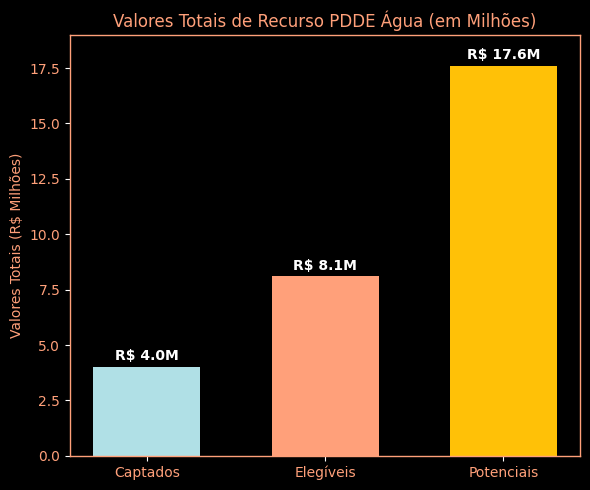

In [123]:
# Utilizando as variáveis totais já definidas
valores_totais = [total_valores_pdde_agua, total_valores_elegiveis, total_valores_potenciais]

# Converte os valores para milhões
valores_totais_milhoes = [valor / 1_000_000 for valor in valores_totais]

# Prepara os dados para o gráfico
categorias = ['Captados', 'Elegíveis', 'Potenciais']

# Tema "dark"
plt.style.use('dark_background')

# Cria do gráfico de barras verticais
plt.figure(figsize=(6, 5))
bars = plt.bar(categorias, valores_totais_milhoes, width=0.6, align='center', color=['#B0E0E6', '#FFA07A', '#FFC107'])

# Adiciona título e rótulos
plt.title('Valores Totais de Recurso PDDE Água (em Milhões)', color='#FFA07A')
plt.ylabel('Valores Totais (R$ Milhões)', color='#FFA07A')

# Altera as cores das bordas (spines)
ax = plt.gca()
ax.spines['top'].set_color('#FFA07A')
ax.spines['bottom'].set_color('#FFA07A')
ax.spines['left'].set_color('#FFA07A')
ax.spines['right'].set_color('#FFA07A')

# Ajusta a espessura das linhas
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Ajusta a cor dos ticks (marcadores de eixo) e define o intervalo de 0 a 18 milhões
plt.xticks(color='#FFA07A', rotation=0)
plt.yticks(color='#FFA07A')
plt.ylim(0, 19)  # Define o intervalo de ticks do eixo y de 0 a 18

# Insere os valores nas barras com separador de milhar
for i, valor in enumerate(valores_totais_milhoes):
    plt.text(i, valor + 0.3, f'R$ {valor:,.1f}M', ha='center', color='white', fontweight='bold')

# Ajusta layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


Como explicado anteriormente, a logística amazônica é um grande desafio a ser vencido para implementação de políticas públicas. Os dois gráficos deste tópico demonstram a dimensão do desafio para a universalização do fornecimento de água potável pelas escolas publicas do Estado do Acre e uma grave falha na gestão escolar pela Secretaria Estadual e pelas Secretarias Municipais de educação. Há um impedimento burocrático que extrapola a escassez de recursos financeiros.  

O contexo de crise hídrica que assola a Amazônia no ano de 2024 aponta para a urgência da ação.  
  
Ao mesmo tempo em que este quadro evidencia a necessidade de uma intervenção imediata das Promotorias de Justiça do interior do Estado, ele também traz o potencial impacto que esta ação possui sobre a qualidade da educação e saúde públicas.  


# Relatórios discriminando as escolas que demandam intervenção das Promotorias de Justiça, por Município



Para cumprir o objetivo de apresentar um relatório que identifique precisamente as escolas que demandam a intervenção da Promotoria com atribuições no respectivo Município, o código abaixo faz essa discriminação. Serão elaborados três relatórios distintos em razão da diferença de atuação necessária. As inconsistências do censo escolar apontadas acima já estão abrangidas nos relatórios sobre o PDDE Água e não necessitam de relatórios específicos.

## Relatório de escolas elegíveis para acessar o PDDE Água imediatamente, por Município

In [124]:
# Relatório que discrima as escolas elegiveis dentro de cada município
for municipio, grupo in escolas_elegiveis_pdde_agua.groupby('NO_MUNICIPIO'):
    print(f"\nMunicípio: {municipio} ({len(grupo)} escolas)\n")
    print(f"{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'NO_ENTIDADE':<50}{'TP_LOCALIZACAO':<15}{'VALORES_PDDE_AGUA':<15}")
    print("-" * 114)

    for index, row in grupo.iterrows():
        dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
        localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
        print(f"{row['CO_ENTIDADE']:<15}{dependencia:<15}{row['NO_ENTIDADE']:<50}{localizacao:<15}{row['VALORES_PDDE_AGUA']:15}")



Município: Assis Brasil (37 escolas)

CO_ENTIDADE    TP_DEPENDENCIA NO_ENTIDADE                                       TP_LOCALIZACAO VALORES_PDDE_AGUA
------------------------------------------------------------------------------------------------------------------
12015776       Municipal      ESC ALBERTO MARTAN                                Rural                    25000
12015830       Municipal      ESC CHICO MENDES                                  Rural                    25000
12015890       Municipal      ESC FRANCISCO MENEZES DE ARAUJO                   Rural                    25000
12015989       Municipal      ESC JOSE VILEME DE ARAUJO                         Rural                    25000
12016047       Municipal      ESC PETRONIO FELINTO DE ALMEIDA                   Rural                    25000
12016063       Municipal      ESC RECIFE                                        Rural                    25000
12016128       Municipal      ESC TANCREDO DE ALMEIDA NEVES        

## Relatório das escolas potenciais que poderiam acessar o PDDE Água, por Município

In [125]:
# Relatório que discrima as escolas não elegiveis dentro de cada município
for municipio, grupo in escolas_potenciais_pdde_agua.groupby('NO_MUNICIPIO'):
    print(f"\nMunicípio: {municipio} ({len(grupo)} escolas)\n")
    print(f"{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'NO_ENTIDADE':<50}{'TP_LOCALIZACAO':<15}{'VALORES_PDDE_AGUA':<15}")
    print("-" * 114)

    for index, row in grupo.iterrows():
        dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
        localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
        print(f"{row['CO_ENTIDADE']:<15}{dependencia:<15}{row['NO_ENTIDADE']:<50}{localizacao:<15}{row['VALORES_PDDE_AGUA']:15}")



Município: Acrelândia (6 escolas)

CO_ENTIDADE    TP_DEPENDENCIA NO_ENTIDADE                                       TP_LOCALIZACAO VALORES_PDDE_AGUA
------------------------------------------------------------------------------------------------------------------
12008966       Municipal      ESC ALTINA MAGALHAES DA SILVA                     Rural                    32000
12009164       Estadual       ESC MARIA DE JESUS RIBEIRO                        Rural                    28000
12018422       Estadual       ESC SANTA LUCIA III                               Rural                    32000
12023582       Municipal      ESC BOM JESUS                                     Rural                    32000
12034100       Municipal      ESC JAIME DE ALENCAR                              Rural                    28000
12128236       Estadual       ESC FAMILIA AGRICOLA JEAN PIERRE MINGAN           Rural                    28000

Município: Assis Brasil (55 escolas)

CO_ENTIDADE    TP_DEPENDENCIA N

## Relatório discriminando as escolas que acessaram o PDDE Água e informaram não oferecer água potável, por Município

Este ponto merece especial atenção, visto que houve destinação de recursos para as escolas adequarem o fornecimento de água em suas depências e estas informaram não oferecer água potável. Estes casos podem refletir desde um erro de marcação do censo escolar até o crime de peculato. Ainda, exigirão o ajuizamento de Ação Civil Pública, para obrigar o respectivo ente federativo a adequar o fornecimento de água.

In [126]:
# Filtra as escolas que acessaram o PDDE Água e informaram ao censo escolar não
# oferecer água potável
escolas_pdde_agua_sem_potavel = ds_agua[
    (
        (ds_agua['PDDE_AGUA'] == 1) &
        (ds_agua['IN_AGUA_POTAVEL'] == 0)
    )
]

# Agrupa as escolas que acessaram o PDDE Água por Município
escolas_pdde_agua_sem_potavel = escolas_pdde_agua_sem_potavel.sort_values(by='NO_MUNICIPIO')

# Imprime o total de escolas que acessaram o PDDE Água
print(f'Total de escolas que acessaram o PDDE Água e declararam não oferecer água potável: {len(escolas_pdde_agua_sem_potavel)}\n')

# Mapeamento de 'TP_DEPENDENCIA' para valores "Federal", "Estadual", "Municipal" e "Privada"
dependencia_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}

# Mapeamento de 'TP_LOCALIZACAO' para valores "Urbana" e "Rural"
localizacao_map = {1: 'Urbana', 2: 'Rural'}

# Relatório que discrima as escolas não elegiveis dentro de cada município
for municipio, grupo in escolas_pdde_agua_sem_potavel.groupby('NO_MUNICIPIO'):
    print(f"\nMunicípio: {municipio} ({len(grupo)} escolas)\n")
    print(f"{'CO_ENTIDADE':<15}{'TP_DEPENDENCIA':<15}{'NO_ENTIDADE':<50}{'TP_LOCALIZACAO':<15}{'VALORES_PDDE_AGUA':<15}")
    print("-" * 114)

    for index, row in grupo.iterrows():
        dependencia = dependencia_map.get(row['TP_DEPENDENCIA'], 'Desconhecido')
        localizacao = localizacao_map.get(row['TP_LOCALIZACAO'], 'Desconhecida')
        print(f"{row['CO_ENTIDADE']:<15}{dependencia:<15}{row['NO_ENTIDADE']:<50}{localizacao:<15}{row['VALORES_PDDE_AGUA']:15}")


Total de escolas que acessaram o PDDE Água e declararam não oferecer água potável: 83


Município: Brasiléia (6 escolas)

CO_ENTIDADE    TP_DEPENDENCIA NO_ENTIDADE                                       TP_LOCALIZACAO VALORES_PDDE_AGUA
------------------------------------------------------------------------------------------------------------------
12025534       Municipal      ESC HUMAITA                                       Rural                    25000
12016845       Municipal      ESC RAIMUNDA FLORES                               Rural                    25000
12016977       Municipal      ESC SANTA QUITERIA                                Rural                    25000
12021318       Municipal      ESC CEL JOAO BRANDAO                              Rural                    25000
12016420       Municipal      ESC GESILDA DE FREITAS PAIXAO                     Rural                    25000
12029319       Municipal      ESC JUELITA MEIRELES                              Rural          

### Próximos passos

Da revisão do trabalho realizado até então, do ponto de vista do código, nota-se a necessidade de adoção dos princípios SOLID para criação de classes e funções, a fim de atender as melhores práticas e facilitar a manutenção futura, visto que esse é um trabalho que será realizado anualmente e fará uso de boa parte do código escrito até aqui.  
  
É possível também implementar a automatização da criação e envio de relatórios, com diagramação e informações específicas para cada Promotoria, a fim de melhorar o recebimento da informação pelo destinatário.  
  
Por fim, do ponto de vista do Observatório, nota-se que este trabalho disse respeito somente à problemática do fornecimento de água potável pelas escolas da rede pública. Existem diversos outros problemas e políticas públicas educacionais que serão endereçadas com o uso da análise de dados, conforme visto até aqui.